# Bias Variance Trade-off

In [8]:
import numpy as np
import pandas as pd
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 16,8
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)


# Synthetic Observations

In [9]:
# number of data points 

# Set Parameters
Ndata=200
data_lims=[0,15]
order=3
beta=[10,1,0.1,0.01]
sigma_e=4
train_set=np.arange(100)

#Create Data:
t=np.linspace(data_lims[0],data_lims[1],Ndata)
e=stats.norm.rvs(0,sigma_e,Ndata)
X=np.zeros([Ndata,order+1])
for j in range(order+1):
    X[:,j]=t**j

#True data and obs         
ytrue=np.dot(X,beta)
yobs =ytrue+e


#define a training set
t_train=t[train_set]
X_train=X[train_set,:]
ytrue_train=ytrue[train_set]
yobs_train=yobs[train_set]

Z_train=X[train_set,:-1]
Z=X[:,:-1]

model=LinearRegression().fit(X_train,yobs_train)
yhat_train=model.predict(X_train)

modelz=LinearRegression().fit(Z_train,yobs_train)
zhat_train=modelz.predict(Z_train)

zhat=modelz.predict(Z)

Text(0, 0.5, 'y')

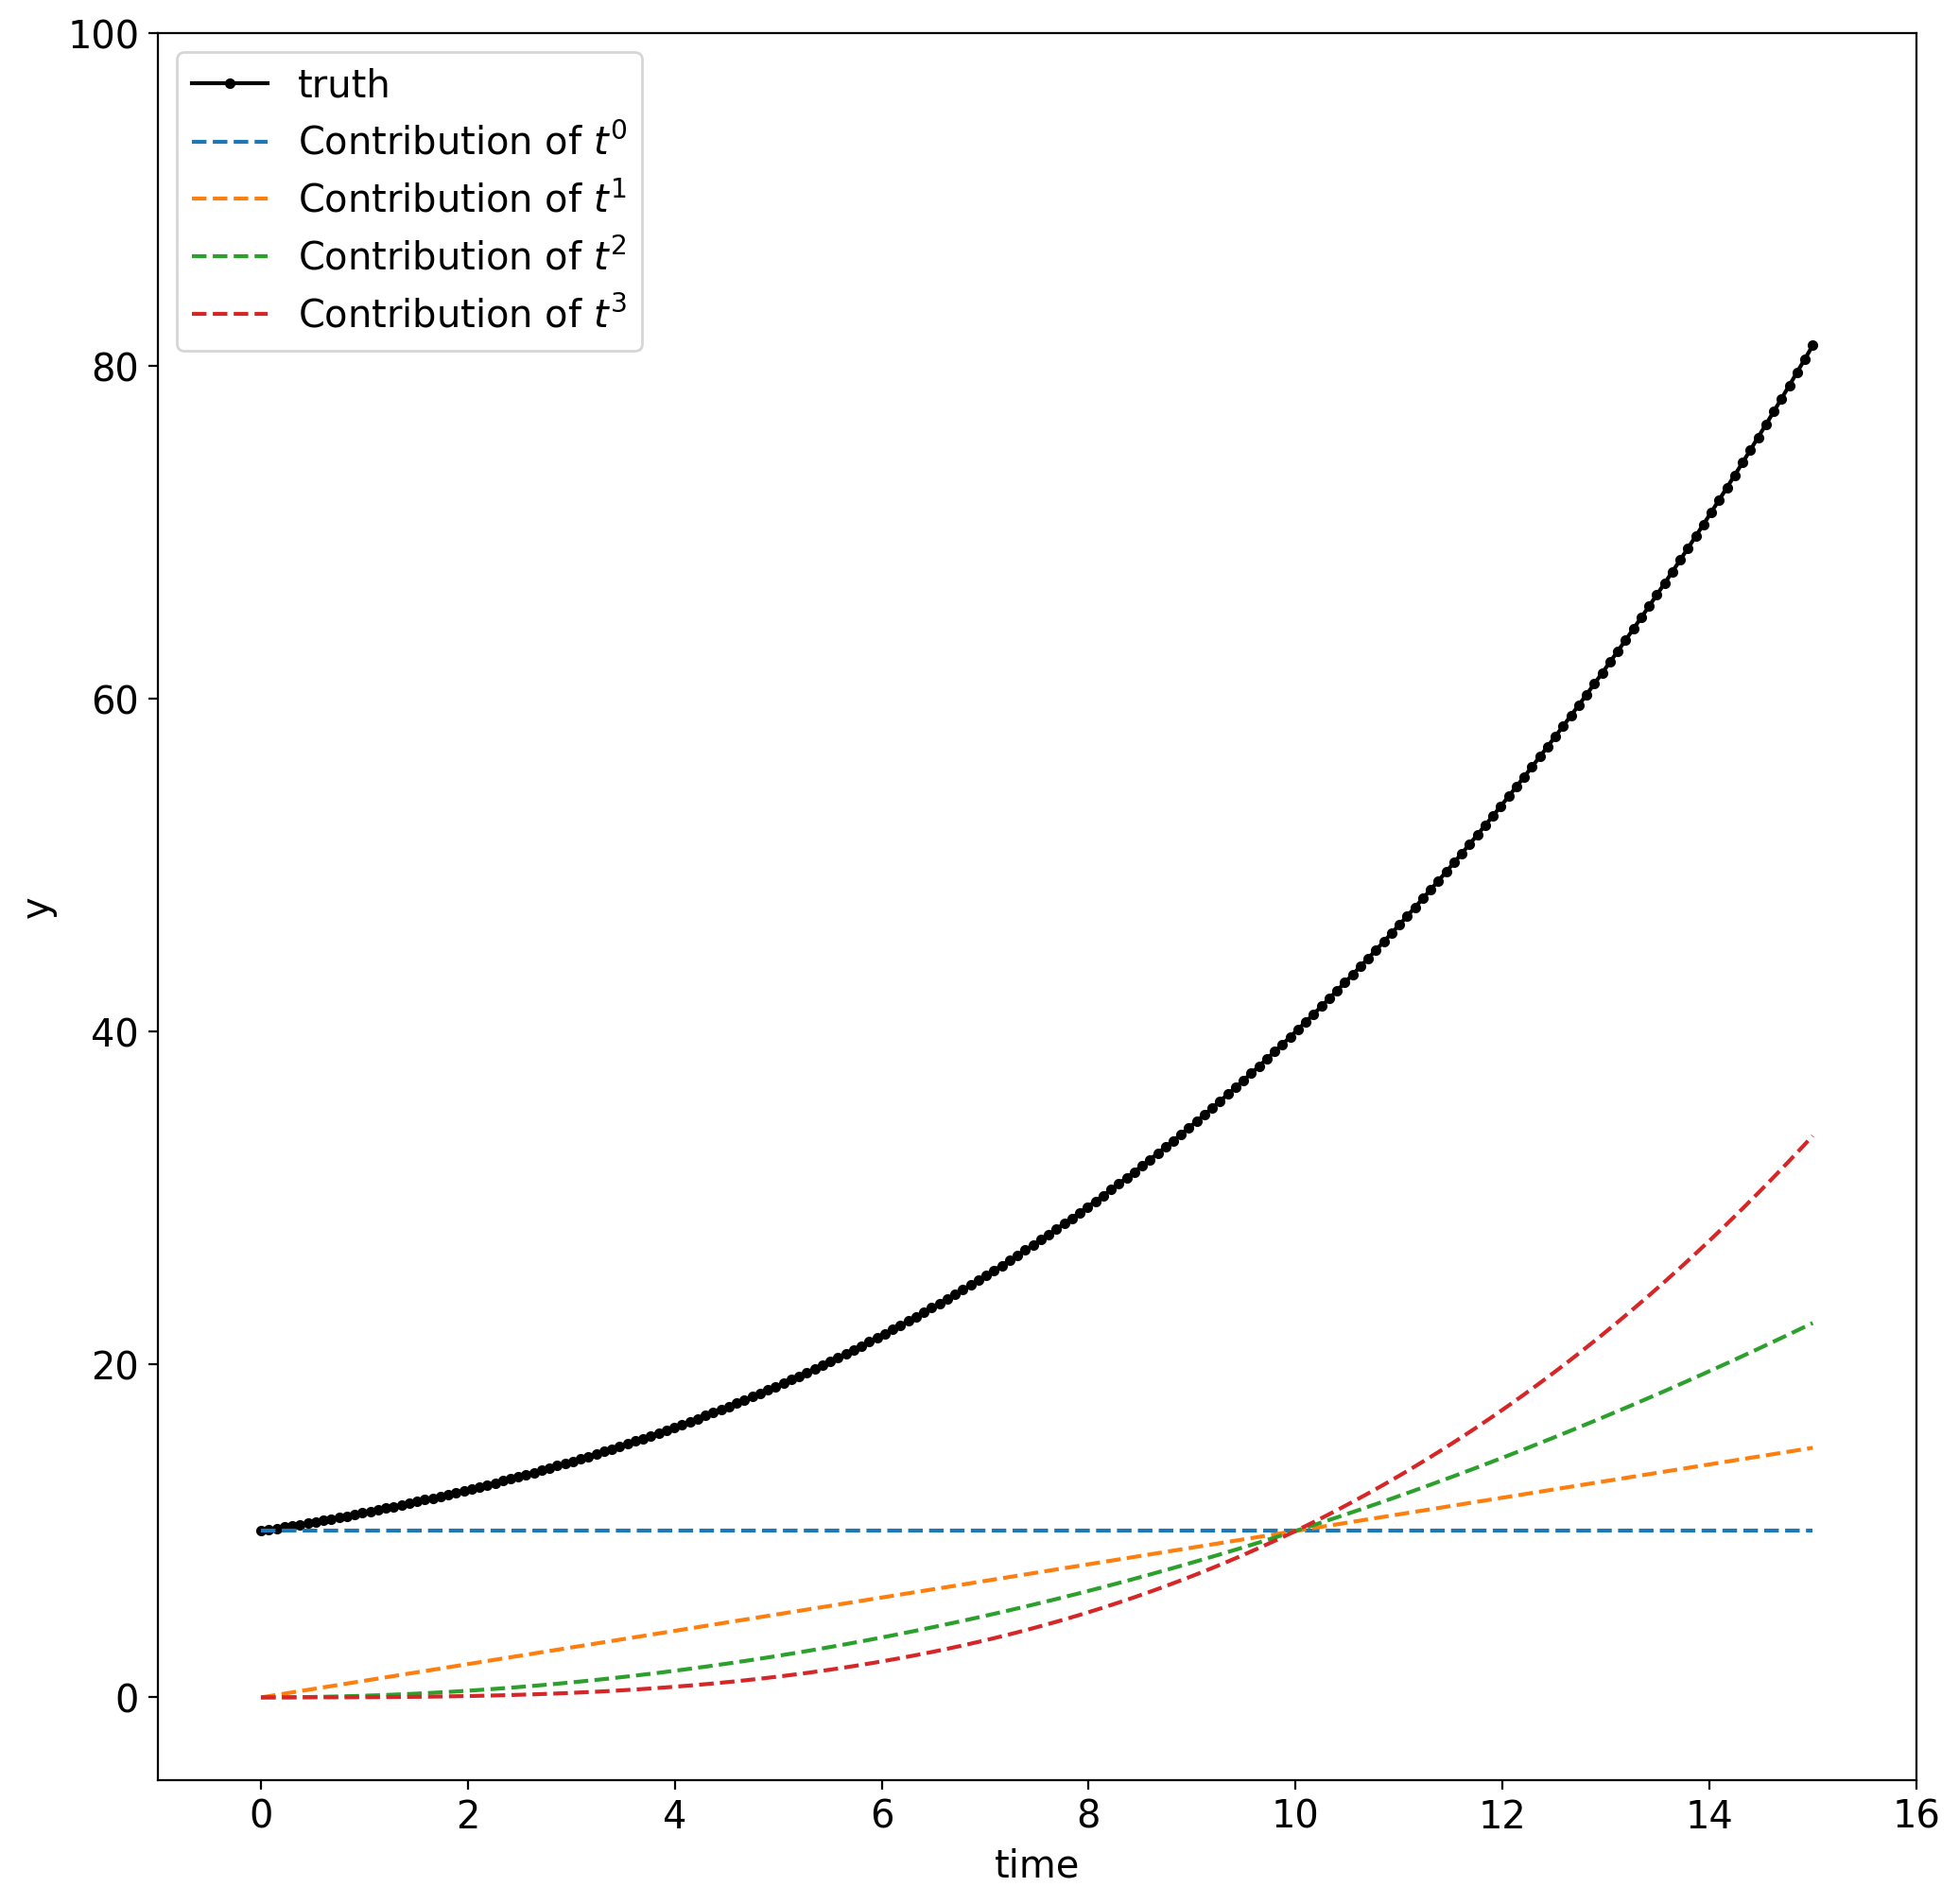

In [10]:
fig,ax=plt.subplots(1,figsize=[12,12])
plt.plot(t,ytrue,'k.-',label='truth')
#plt.vlines(t,ytrue-2*sigma_e,ytrue+2*sigma_e,color=[0.9,0.9,0.9],label='uncertainty')
#plt.plot(t,yobs,'o',markersize=10,label='observations')
for j in range(order+1):
    y=beta[j]*(t**j)
    plt.plot(t,y,'--',label='Contribution of $t^'+str(j)+'$')
plt.legend();
plt.xlim(left=-1,right=16); 
plt.ylim(bottom=-5,top=100)
plt.xlabel('time')
plt.ylabel('y')

Text(0, 0.5, 'y')

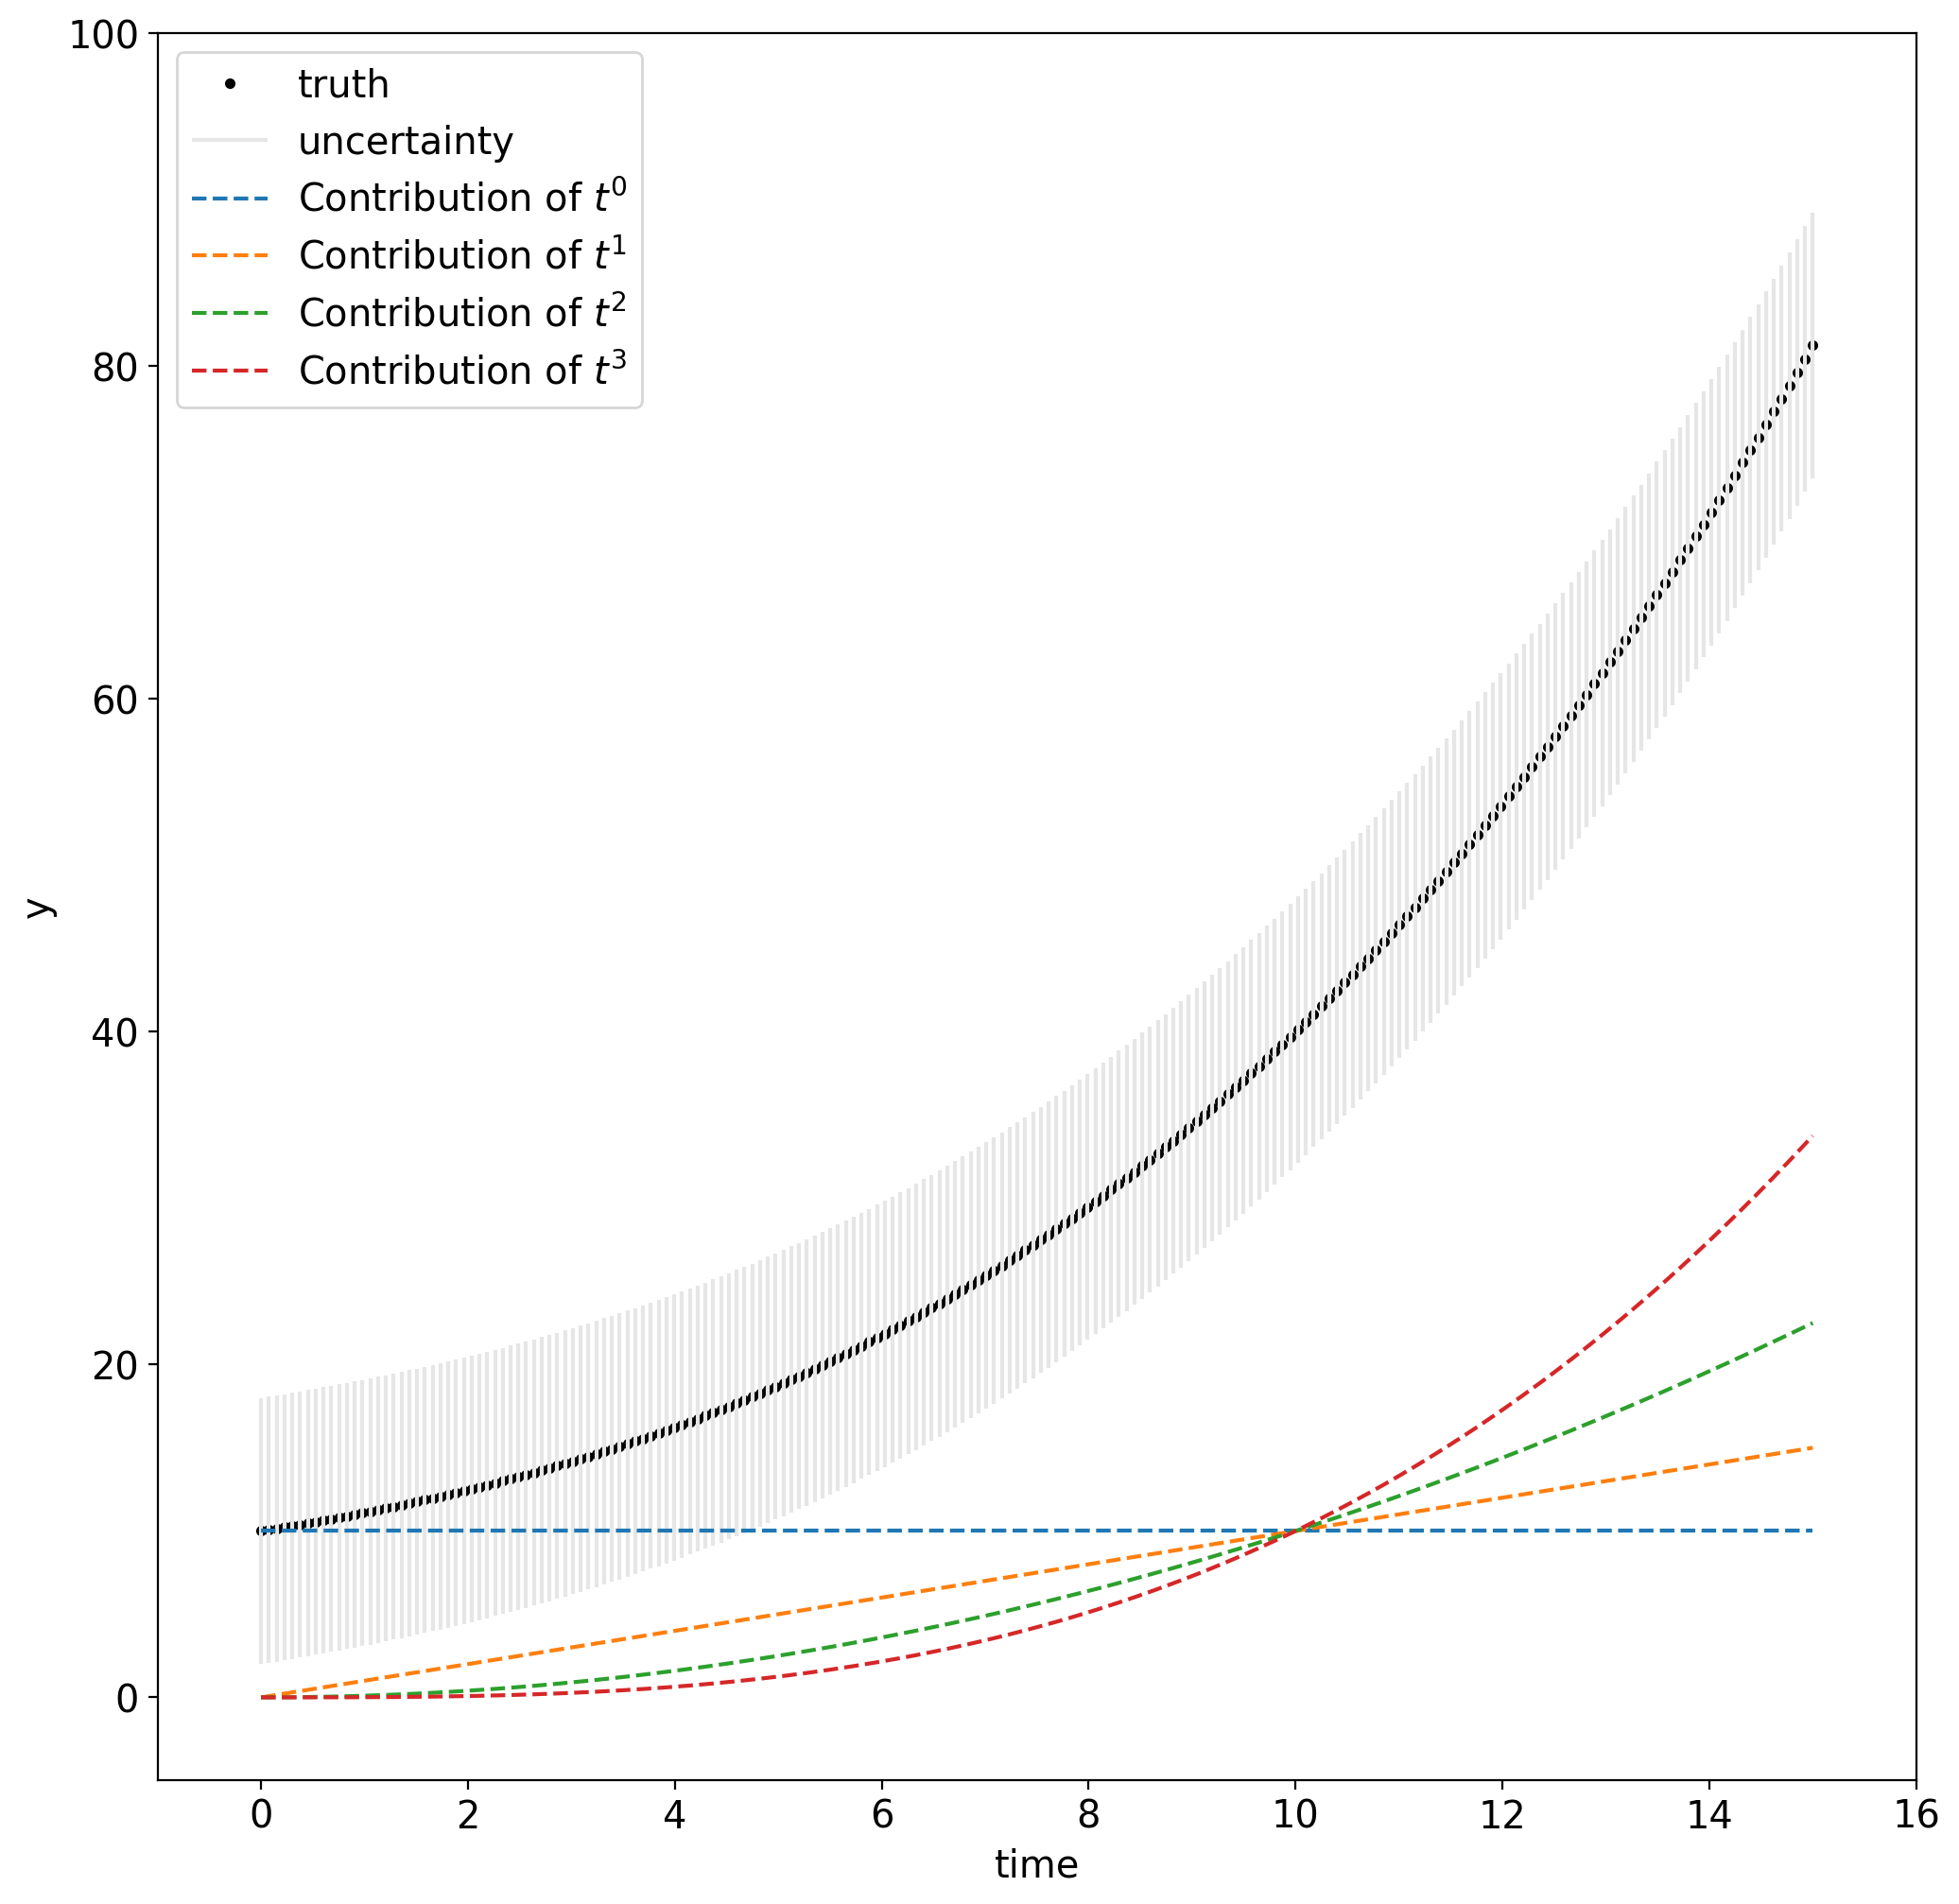

In [11]:
fig,ax=plt.subplots(1,figsize=[12,12])
plt.plot(t,ytrue,'k.',label='truth')
plt.vlines(t,ytrue-2*sigma_e,ytrue+2*sigma_e,color=[0.9,0.9,0.9],label='uncertainty')
#plt.plot(t,yobs,'o',markersize=10,label='observations')
for j in range(order+1):
    y=beta[j]*(t**j)
    plt.plot(t,y,'--',label='Contribution of $t^'+str(j)+'$')
plt.legend();
plt.xlim(left=-1,right=16); 
plt.ylim(bottom=-5,top=100)
plt.xlabel('time')
plt.ylabel('y')

Text(0, 0.5, 'y')

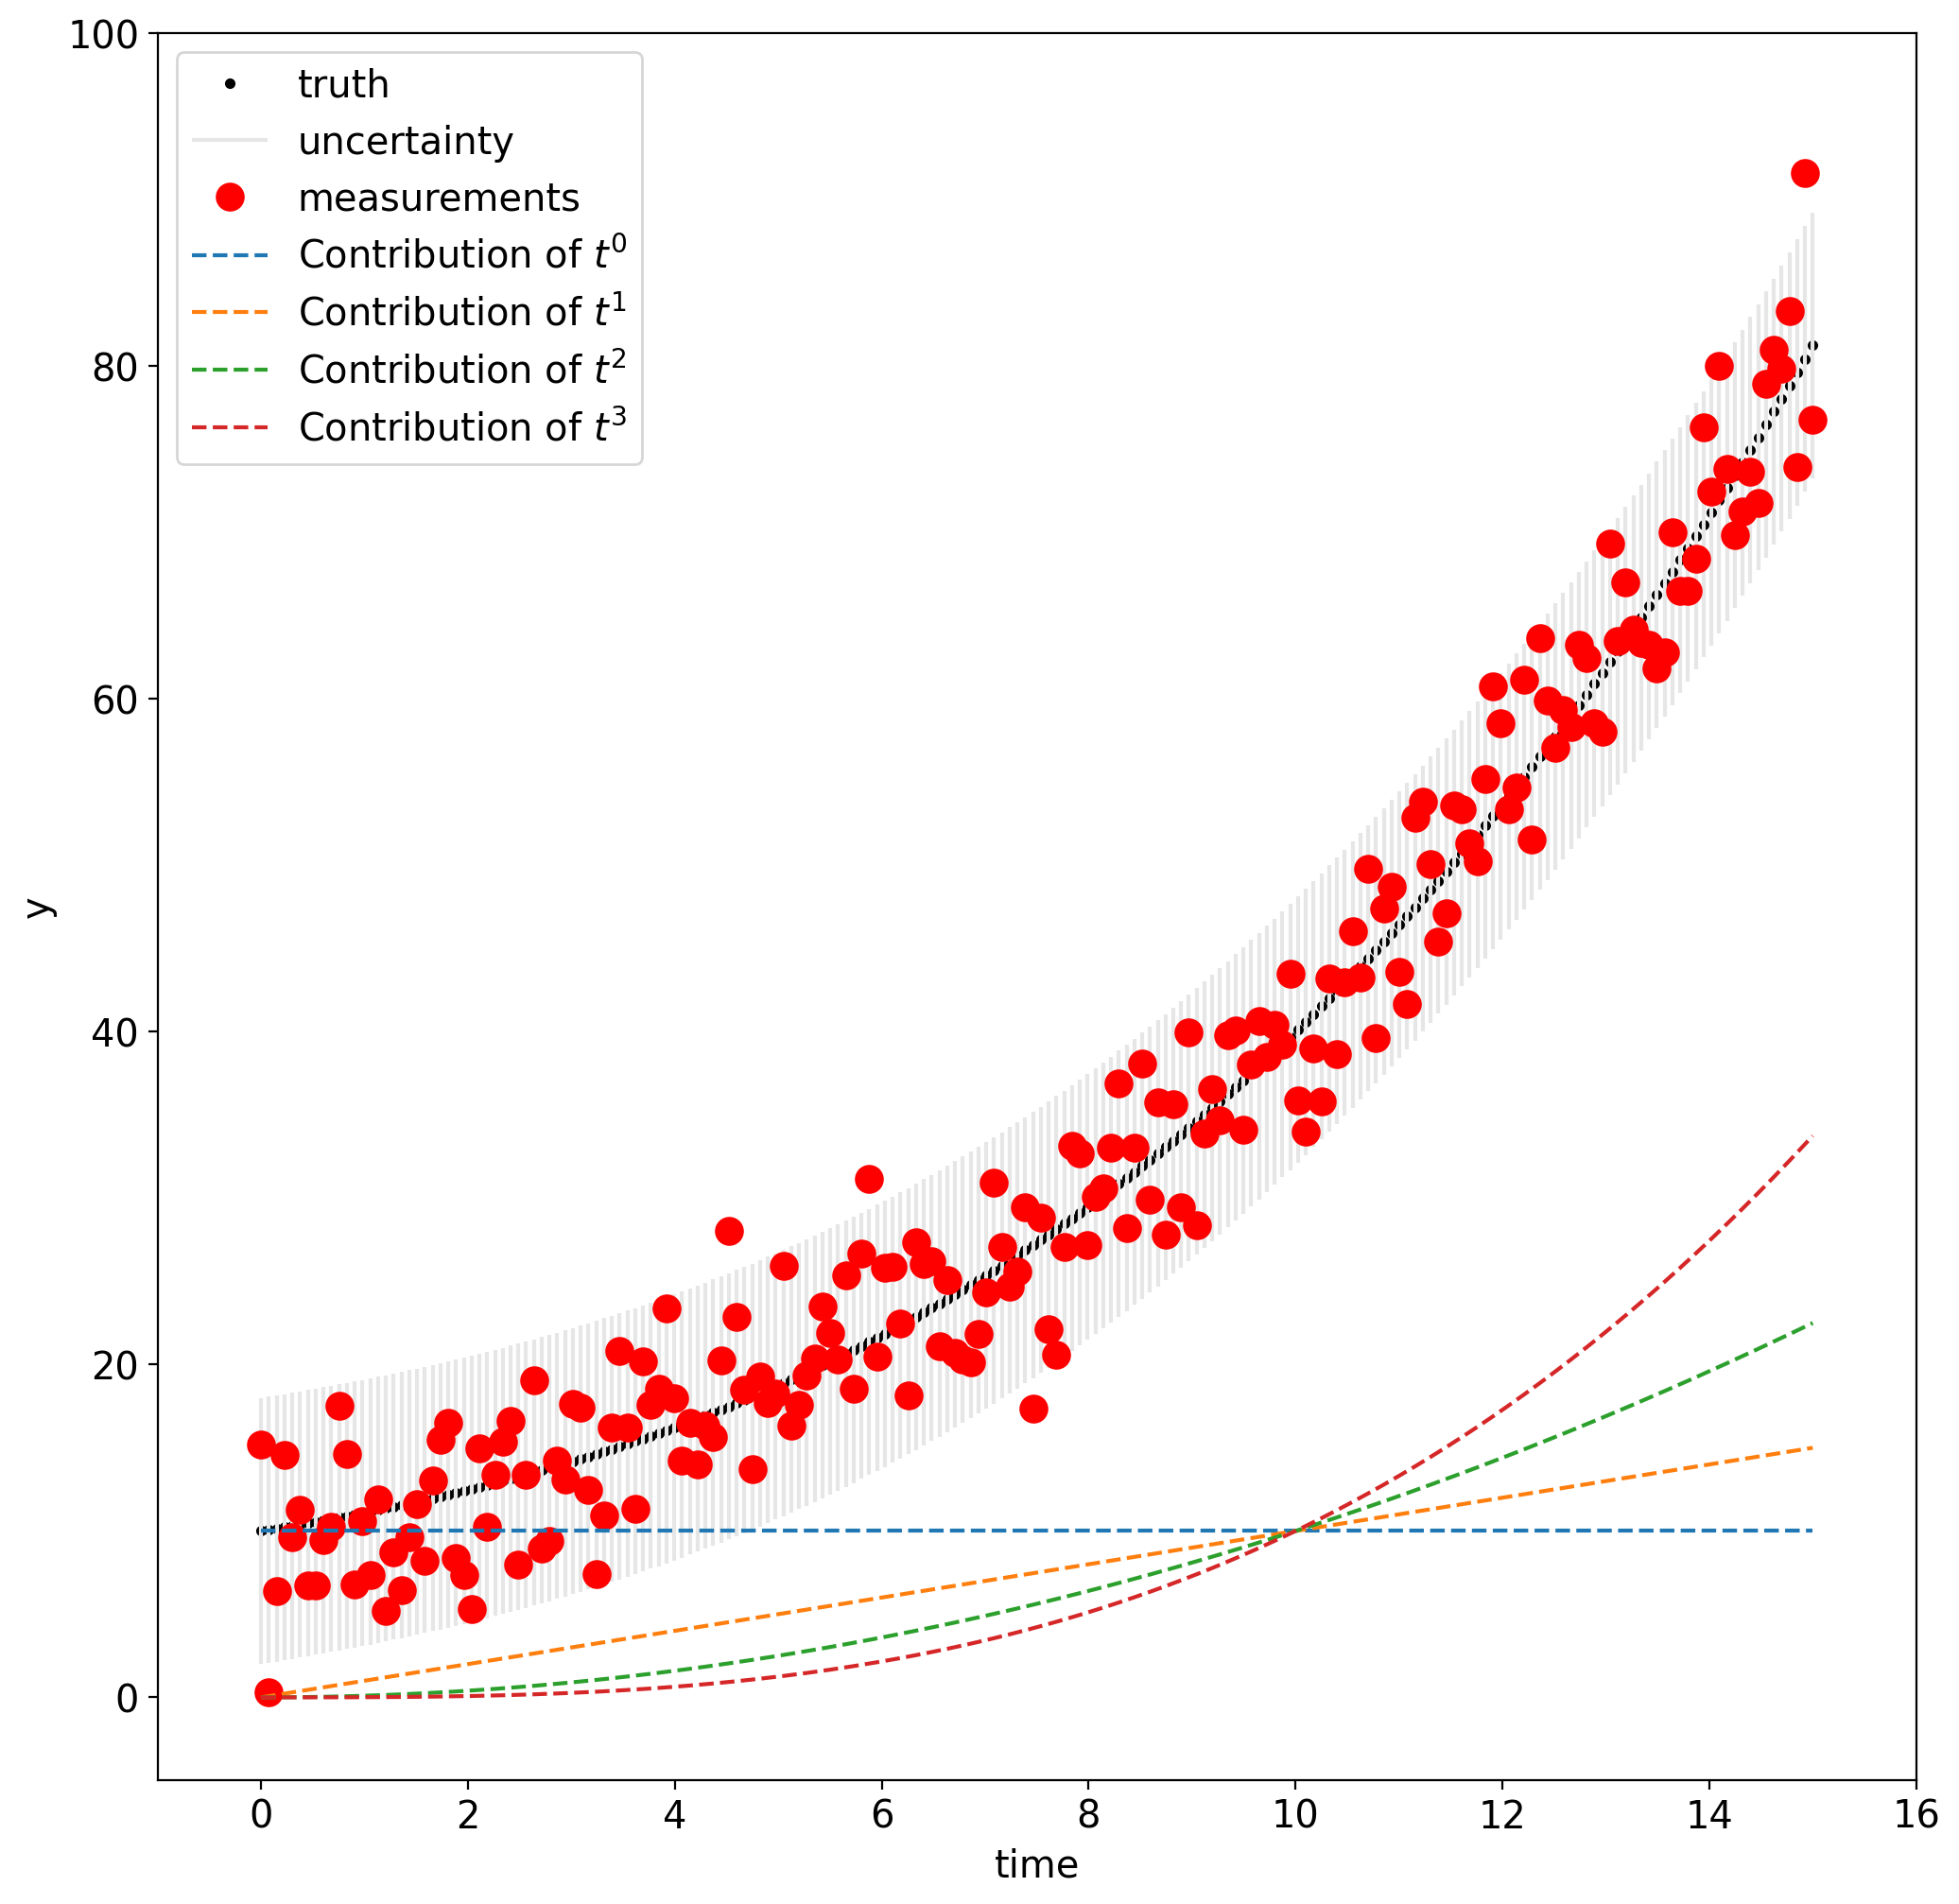

In [12]:
fig,ax=plt.subplots(1,figsize=[12,12])
plt.plot(t,ytrue,'k.',label='truth')
plt.vlines(t,ytrue-2*sigma_e,ytrue+2*sigma_e,color=[0.9,0.9,0.9],label='uncertainty')
plt.plot(t,yobs,'ro',markersize=10,label='measurements')
for j in range(order+1):
    y=beta[j]*(t**j)
    plt.plot(t,y,'--',label='Contribution of $t^'+str(j)+'$')
plt.legend();
plt.xlim(left=-1,right=16);
plt.ylim(bottom=-5,top=100);
plt.xlabel('time')
plt.ylabel('y')

# Training

Text(0, 0.5, 'y')

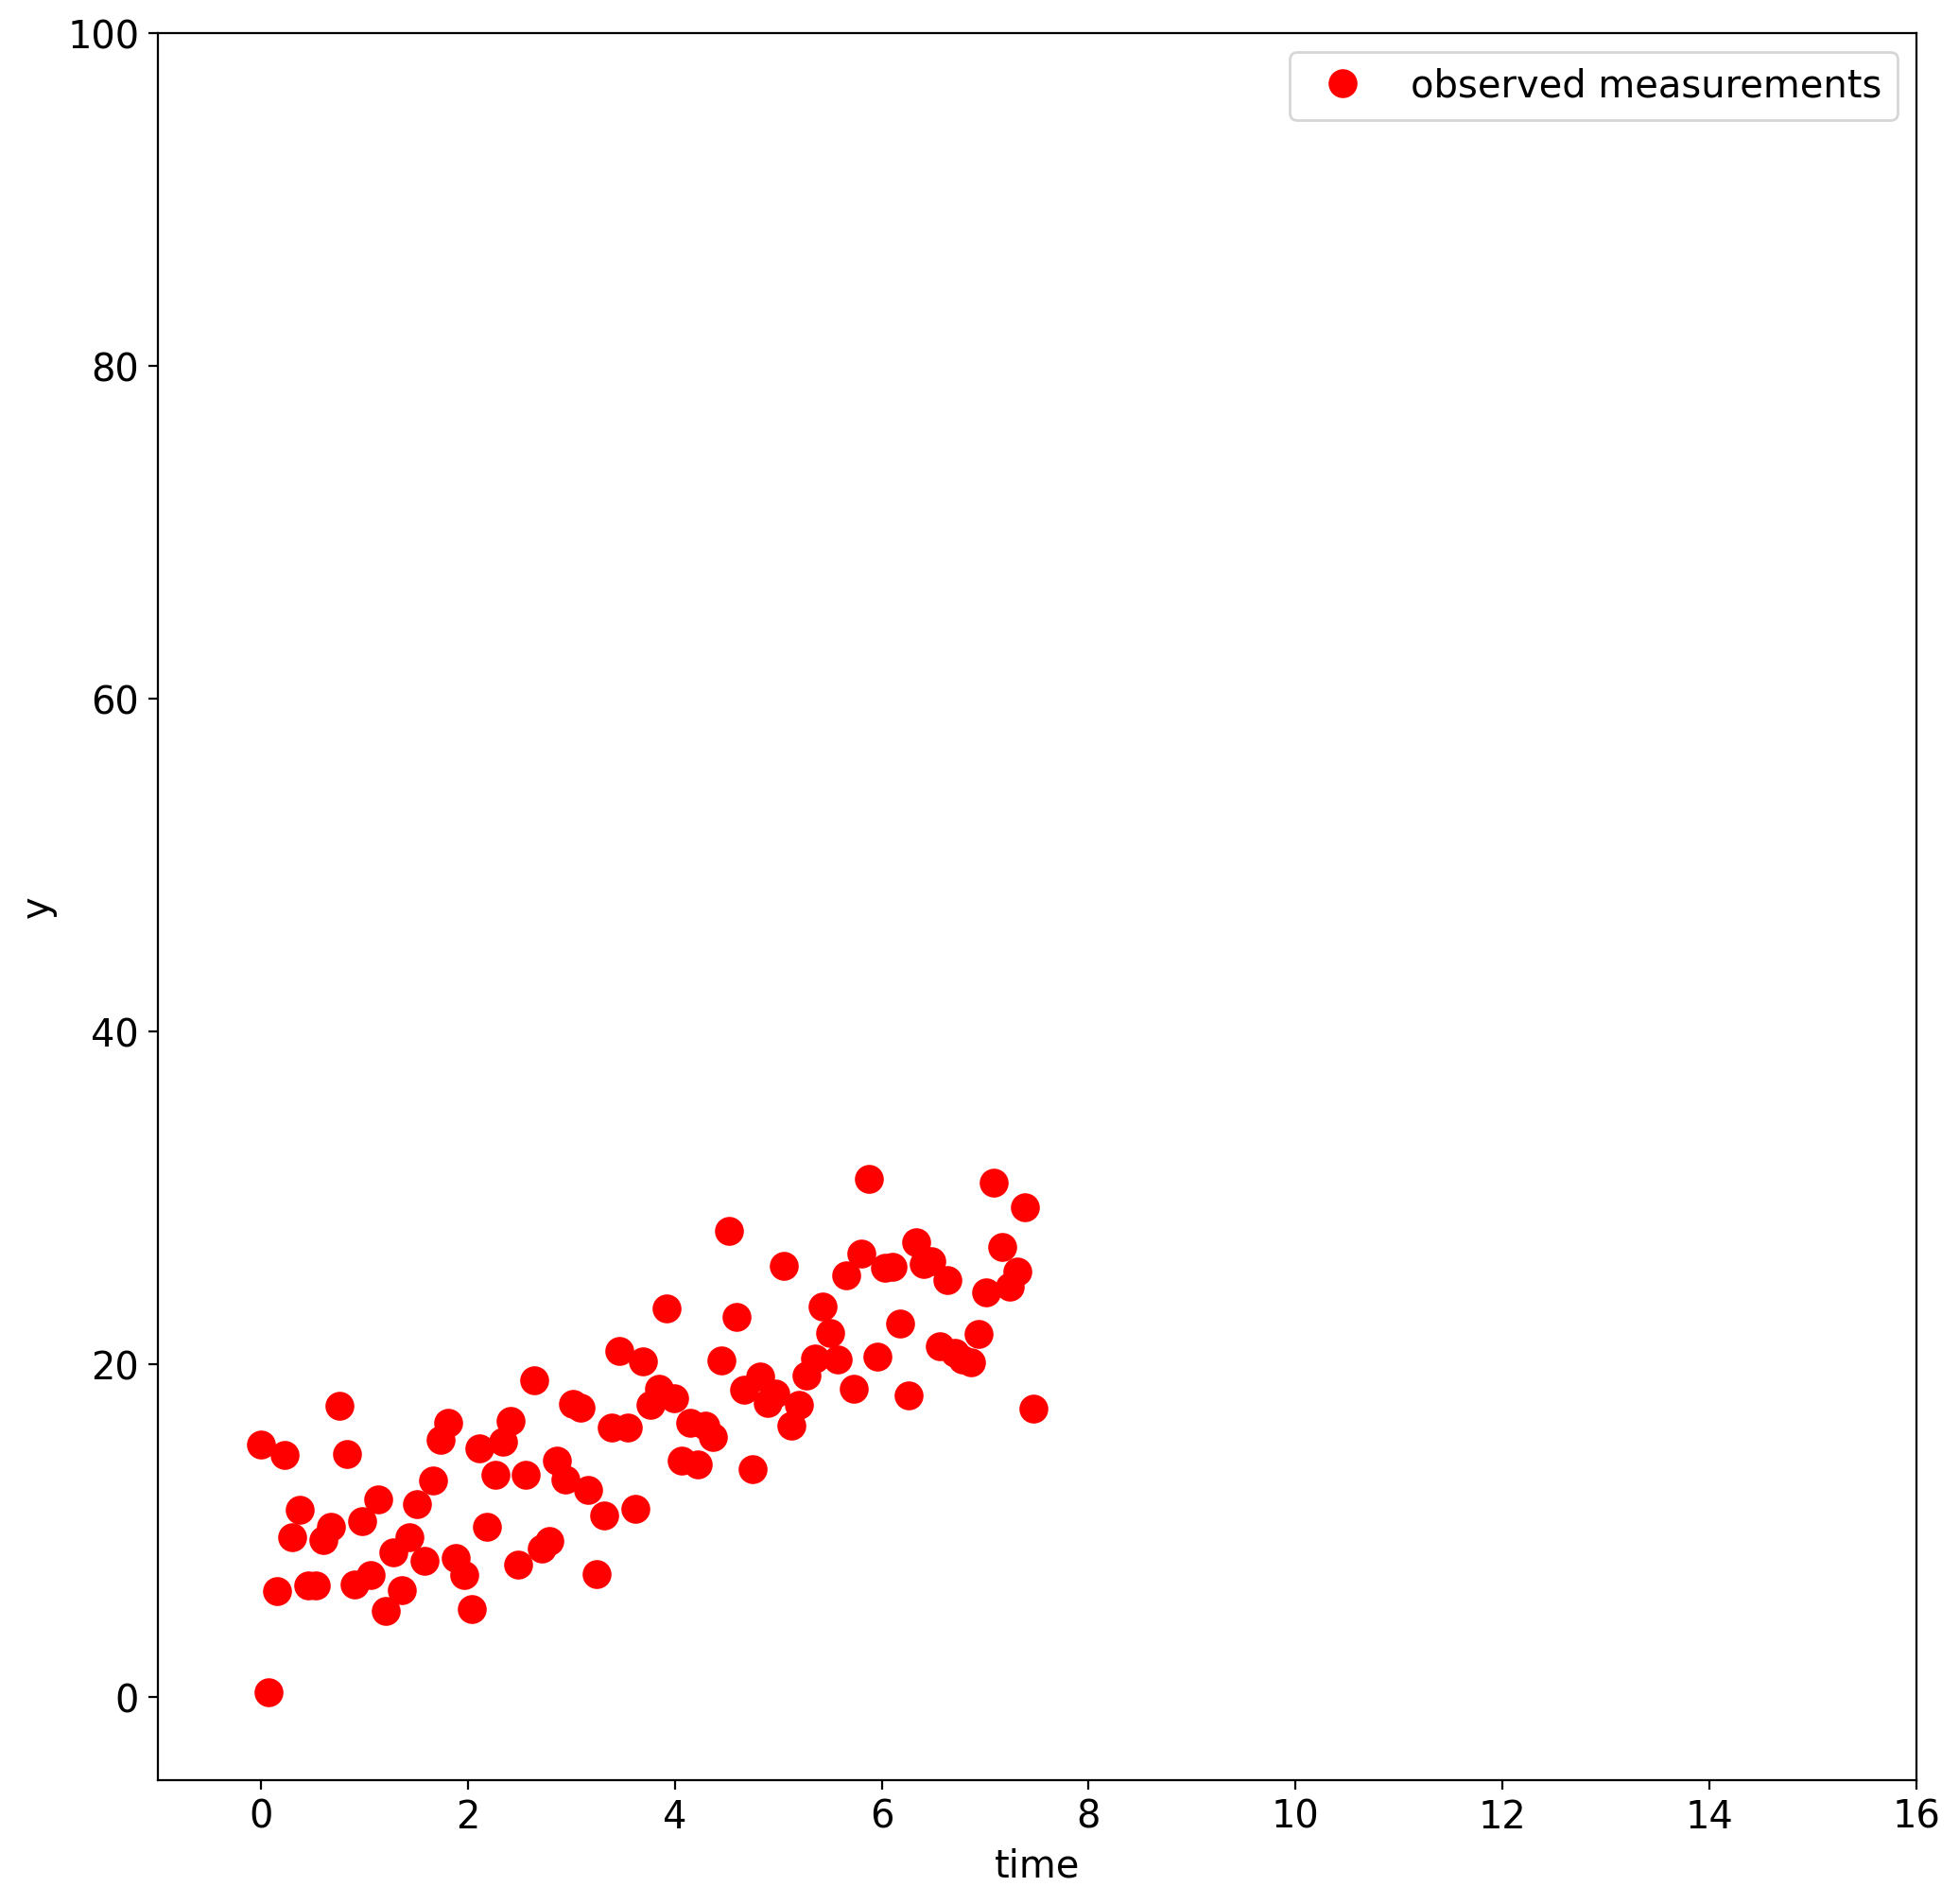

In [13]:
fig,ax=plt.subplots(1,figsize=[12,12])
plt.plot(t_train,yobs_train,'ro',markersize=10,label='observed measurements')
#plt.plot(t_train,yhat_train,'k',linewidth=4,markersize=10,label='training fit')
plt.xlim(left=-1,right=16);
plt.ylim(bottom=-5,top=100);
plt.legend()
plt.xlabel('time')
plt.ylabel('y')

NameError: name 'yhat' is not defined

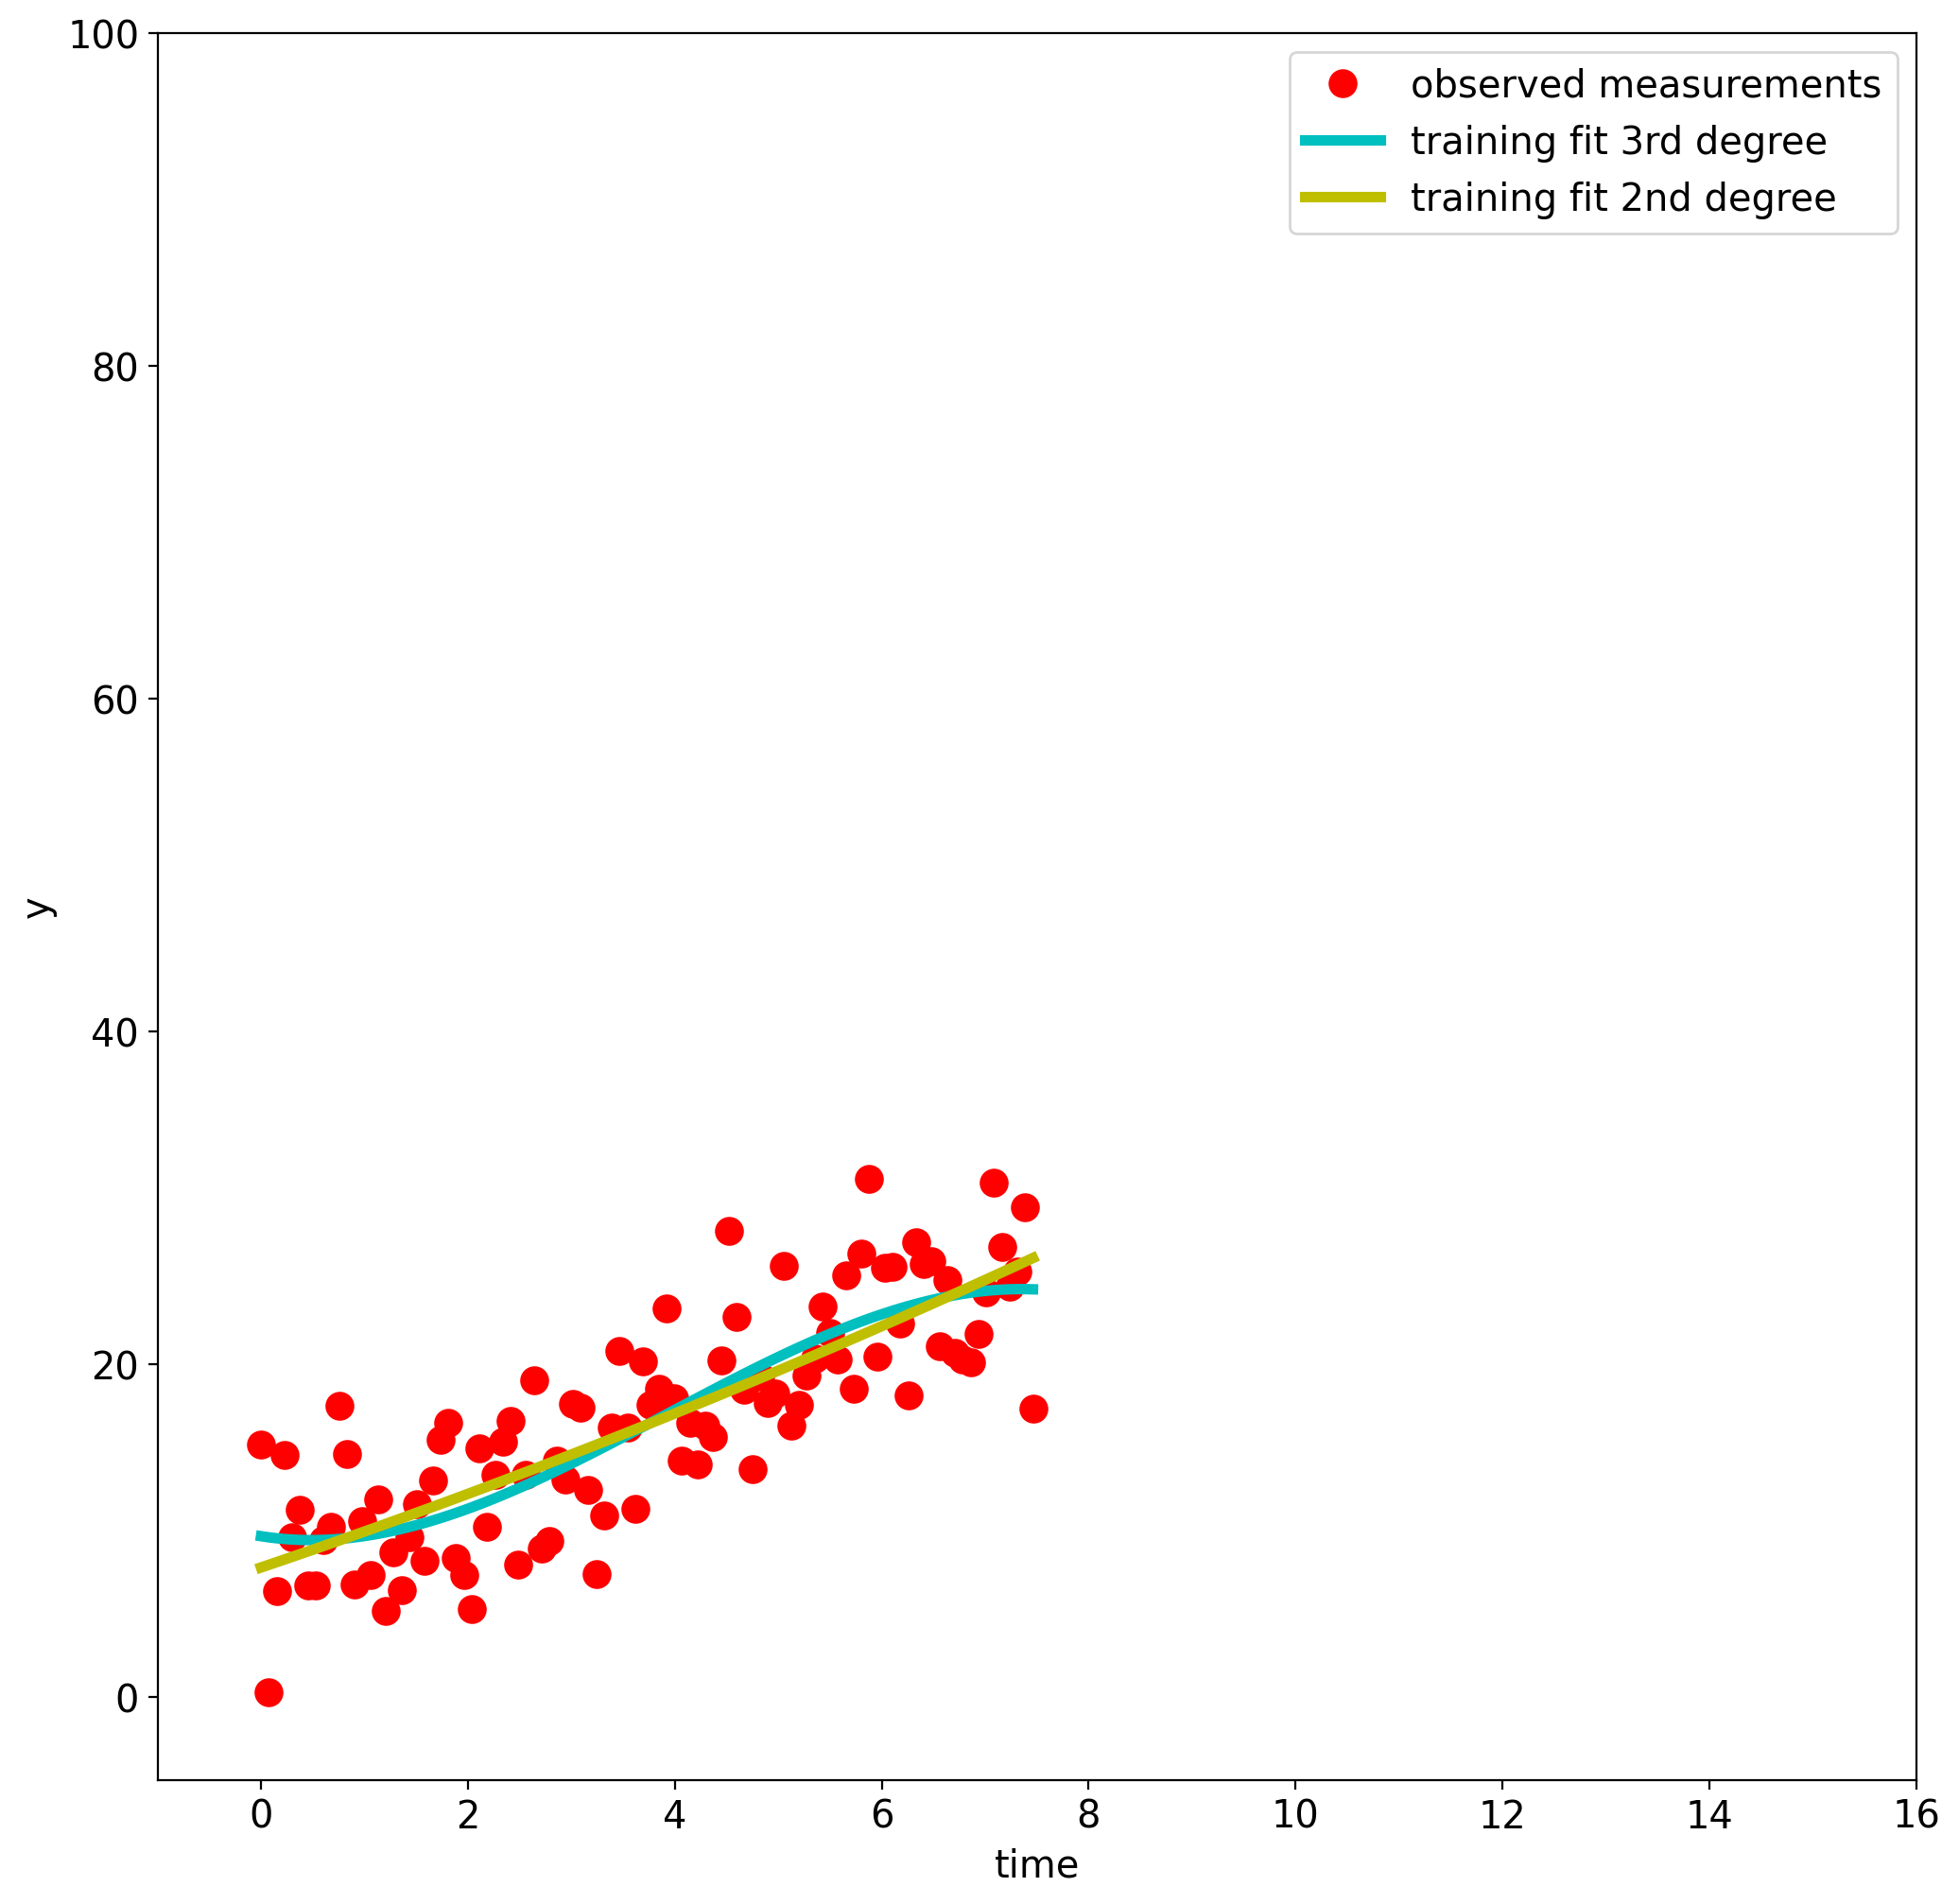

In [14]:
fig,ax=plt.subplots(1,figsize=[12,12])
plt.plot(t_train,yobs_train,'ro',markersize=10,label='observed measurements')
plt.plot(t_train,yhat_train,'c',linewidth=4,markersize=10,label='training fit 3rd degree')
plt.plot(t_train,zhat_train,'y',linewidth=4,markersize=10,label='training fit 2nd degree')
plt.xlim(left=-1,right=16);
plt.ylim(bottom=-5,top=100);
plt.legend()
plt.xlabel('time')
plt.ylabel('y')

mse_train=np.sum((yhat_train-yobs_train)**2)
mse_pred =np.sum((yhat-yobs)**2)-mse_train
mse_train=np.sqrt(mse_train/len(yhat_train))
mse_pred=np.sqrt(mse_pred/(len(yhat)-len(yhat_train)))

plt.text(0,40,'MSE train 3d degree= '+np.array2string(mse_train,precision=2),fontsize=20)

mse_train=np.sum((zhat_train-yobs_train)**2)
mse_pred =np.sum((zhat-yobs)**2)-mse_train
mse_train=np.sqrt(mse_train/len(yhat_train))
mse_pred=np.sqrt(mse_pred/(len(yhat)-len(yhat_train)))

plt.text(0,60,'MSE train 2nd degree= '+np.array2string(mse_train,precision=2),fontsize=20)


# Prediction

Text(0, 60, 'MSE train 2nd degree= 3.84')

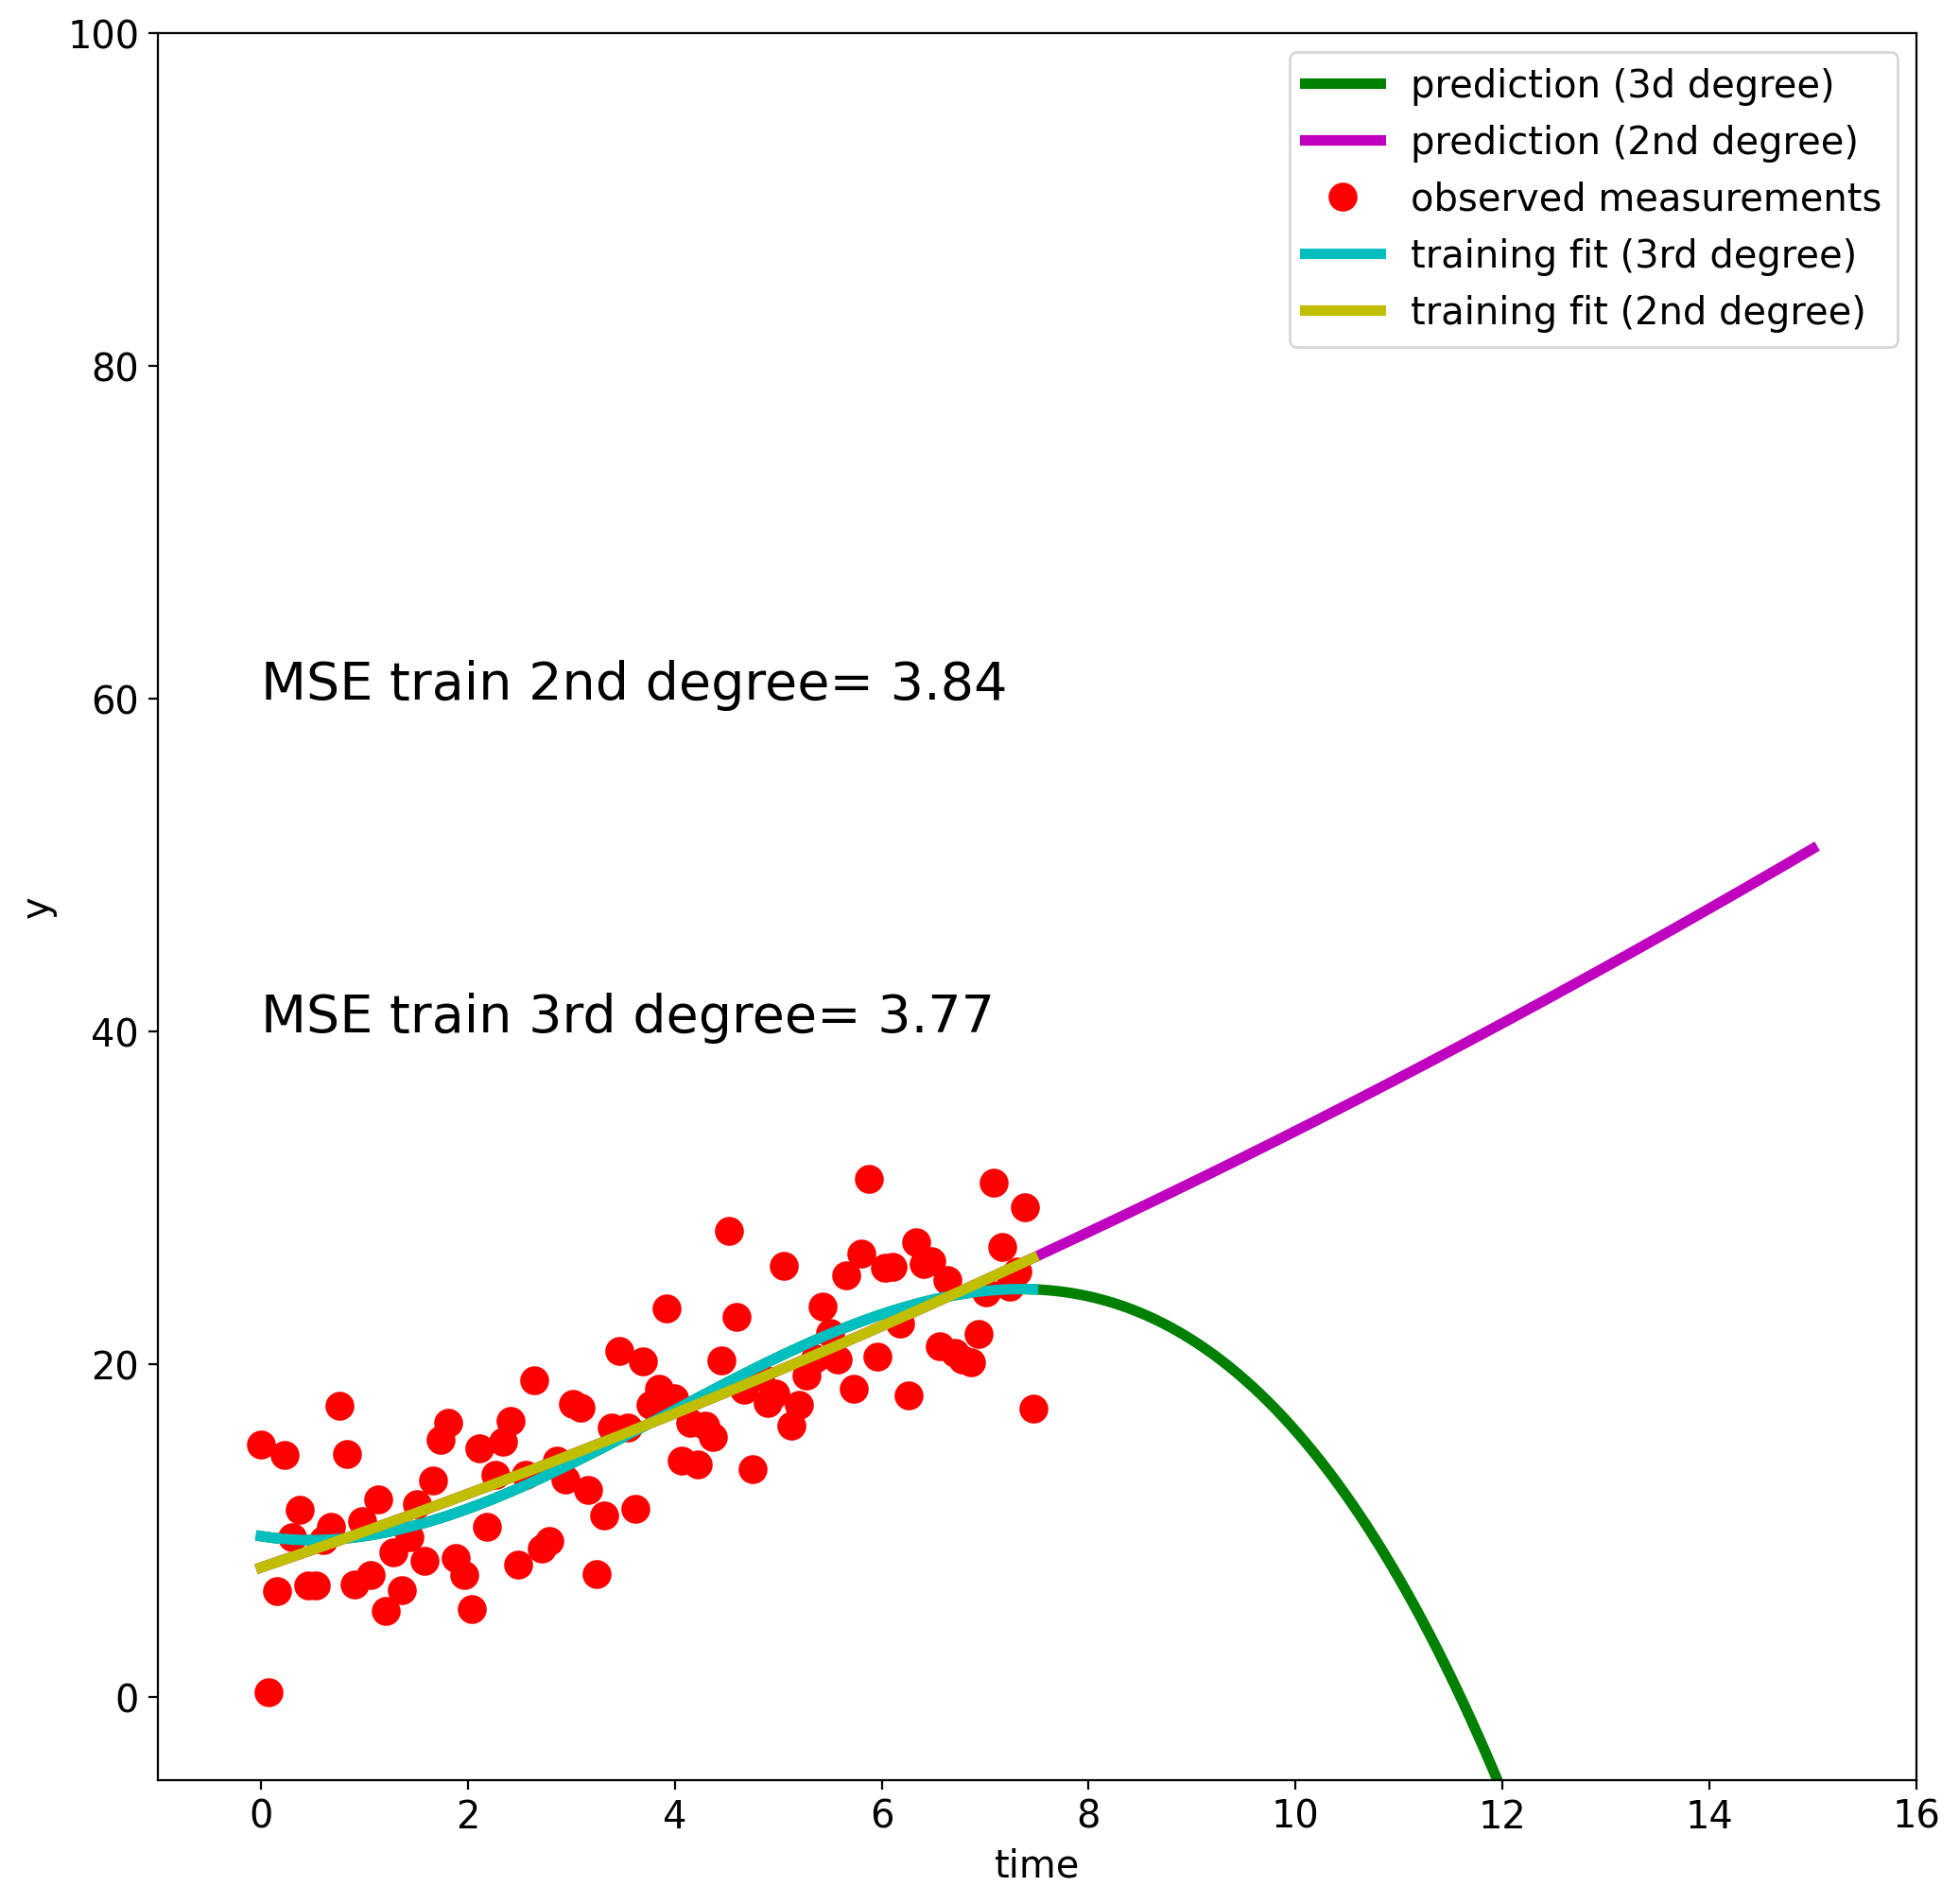

In [15]:
fig,ax=plt.subplots(1,figsize=[12,12])


yhat=model.predict(X)
#yhat=model3.predict(X)

#plt.plot(t,yobs,'o',markersize=12)
#plt.plot(t,ytrue)
#plt.vlines(t,ytrue-2*sigma_e,ytrue+2*sigma_e,color=[0.9,0.9,0.9])
plt.plot(t,yhat,'g-',label='prediction (3d degree)',linewidth=4,)
plt.plot(t,zhat,'m-',label='prediction (2nd degree)',linewidth=4,)
plt.plot(t_train,yobs_train,'ro',markersize=10,label='observed measurements')
plt.plot(t_train,yhat_train,'c',linewidth=4,markersize=10,label='training fit (3rd degree)')

plt.plot(t_train,zhat_train,'y',linewidth=4,markersize=10,label='training fit (2nd degree)')

plt.xlim(left=-1,right=16);
plt.ylim(bottom=-5,top=100);
plt.legend()
plt.xlabel('time')
plt.ylabel('y')

mse_train=np.sum((yhat_train-yobs_train)**2)
mse_pred =np.sum((yhat-yobs)**2)-mse_train
mse_train=np.sqrt(mse_train/len(yhat_train))
mse_pred=np.sqrt(mse_pred/(len(yhat)-len(yhat_train)))

plt.text(0,40,'MSE train 3rd degree= '+np.array2string(mse_train,precision=2),fontsize=20)

mse_train=np.sum((zhat_train-yobs_train)**2)
mse_pred =np.sum((zhat-yobs)**2)-mse_train
mse_train=np.sqrt(mse_train/len(yhat_train))
mse_pred=np.sqrt(mse_pred/(len(yhat)-len(yhat_train)))

plt.text(0,60,'MSE train 2nd degree= '+np.array2string(mse_train,precision=2),fontsize=20)


Text(0, 65, 'MSE pred  2nd degree= 15.71')

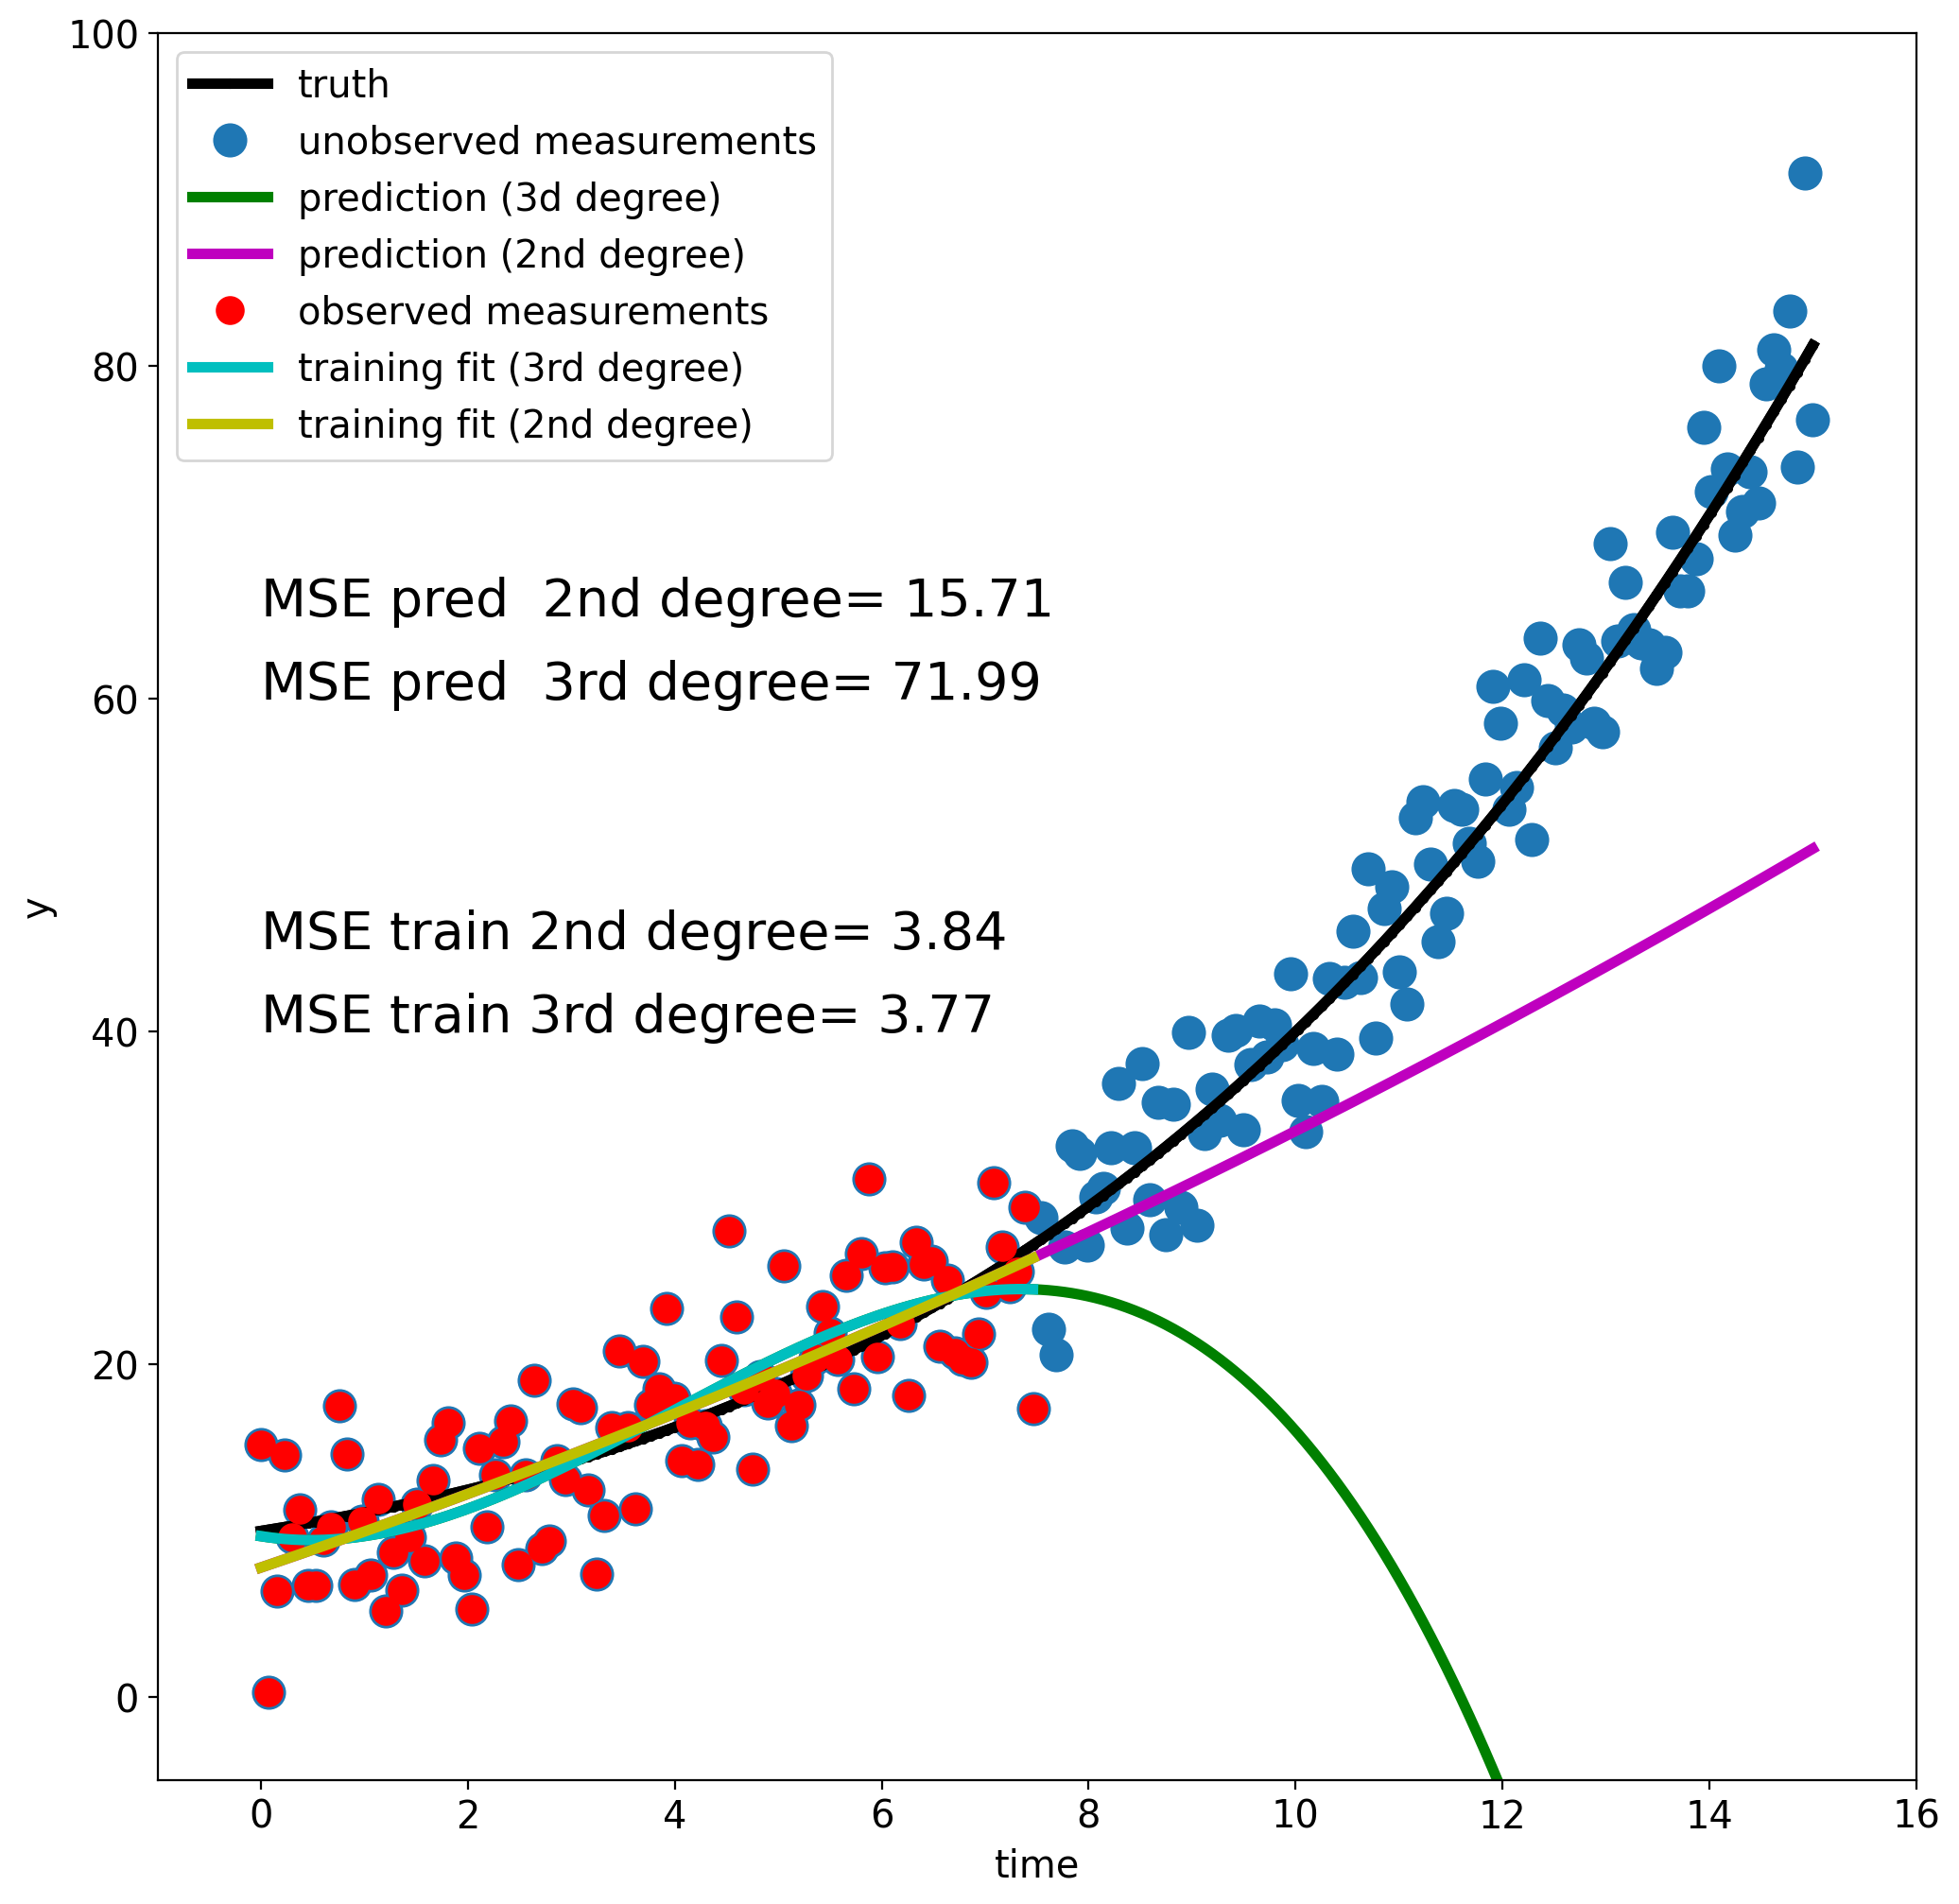

In [16]:
fig,ax=plt.subplots(1,figsize=[12,12])


yhat=model.predict(X)
#yhat=model3.predict(X)

plt.plot(t,ytrue,'k.-',linewidth=4,label='truth')
plt.plot(t,yobs,'o',markersize=12,label='unobserved measurements')
plt.plot(t,ytrue,'k.-',linewidth=4)
#plt.vlines(t,ytrue-2*sigma_e,ytrue+2*sigma_e,color=[0.9,0.9,0.9])
plt.plot(t,yhat,'g-',label='prediction (3d degree)',linewidth=4,)
plt.plot(t,zhat,'m-',label='prediction (2nd degree)',linewidth=4,)
plt.plot(t_train,yobs_train,'ro',markersize=10,label='observed measurements')
plt.plot(t_train,yhat_train,'c',linewidth=4,markersize=10,label='training fit (3rd degree)')

plt.plot(t_train,zhat_train,'y',linewidth=4,markersize=10,label='training fit (2nd degree)')



#plt.plot(t_train,yhat_train,'c',linewidth=4,markersize=10,label='training fit')
plt.xlim(left=-1,right=16);
plt.ylim(bottom=-5,top=100);
plt.legend()

plt.xlabel('time')
plt.ylabel('y')

mse_train=np.sum((yhat_train-yobs_train)**2)
mse_pred =np.sum((yhat-yobs)**2)-mse_train
mse_train=np.sqrt(mse_train/len(yhat_train))
mse_pred=np.sqrt(mse_pred/(len(yhat)-len(yhat_train)))

plt.text(0,40,'MSE train 3rd degree= '+np.array2string(mse_train,precision=2),fontsize=20)
plt.text(0,60,'MSE pred  3rd degree= '+np.array2string(mse_pred,precision=2),fontsize=20)

mse_train=np.sum((zhat_train-yobs_train)**2)
mse_pred =np.sum((zhat-yobs)**2)-mse_train
mse_train=np.sqrt(mse_train/len(yhat_train))
mse_pred=np.sqrt(mse_pred/(len(yhat)-len(yhat_train)))

plt.text(0,45,'MSE train 2nd degree= '+np.array2string(mse_train,precision=2),fontsize=20)
plt.text(0,65,'MSE pred  2nd degree= '+np.array2string(mse_pred,precision=2),fontsize=20)

In [30]:
# number of data points 

Ndraws=100
yhat_vec=np.zeros([200,Ndraws])
zhat_vec=np.zeros([200,Ndraws])

mse_pred_vec=np.zeros(Ndraws)
mse_train_vec=np.zeros(Ndraws)

mse_pred_vec2=np.zeros(Ndraws)
mse_train_vec2=np.zeros(Ndraws)

bias_vec=np.zeros(Ndraws)
bias_vec2=np.zeros(Ndraws)

# Set Parameters
Ndata=200
data_lims=[0,15]
order=2
beta=[10,1,0.1,0.01]
sigma_e=4
train_set=np.arange(100)



for k in range(Ndraws):
    #Create Data:
    t=np.linspace(data_lims[0],data_lims[1],Ndata)
    e=stats.norm.rvs(0,sigma_e,Ndata)
    X=np.zeros([Ndata,order+1])
    for j in range(order+1):
        X[:,j]=t**j

    #True data and obs         
    ytrue=np.dot(X,beta)
    yobs =ytrue+e


    #define a training set
    t_train=t[train_set]
    X_train=X[train_set,:]
    ytrue_train=ytrue[train_set]
    yobs_train=yobs[train_set]

    model=LinearRegression().fit(X_train,yobs_train)
    yhat_train=model.predict(X_train)
    yhat=model.predict(X)
    yhat_vec[:,k]=yhat                    
    
    Z_train=X[train_set,:-1]
    Z=X[:,:-1]
    modelz=LinearRegression().fit(Z_train,yobs_train)
    zhat_train=modelz.predict(Z_train)
    zhat=modelz.predict(Z)
    zhat_vec[:,k]=zhat        
    
    mse_train=np.sum((yhat_train-yobs_train)**2)
    mse_pred =np.sum((yhat-yobs)**2)-mse_train
    mse_train=np.sqrt(mse_train/len(yhat_train))
    mse_pred=np.sqrt(mse_pred/(len(yhat)-len(yhat_train)))

    mse_pred_vec[k]=mse_pred
    mse_train_vec[k]=mse_train
    
    mse_train=np.sum((zhat_train-yobs_train)**2)
    mse_pred =np.sum((zhat-yobs)**2)-mse_train
    mse_train=np.sqrt(mse_train/len(yhat_train))
    mse_pred=np.sqrt(mse_pred/(len(yhat)-len(yhat_train)))

    mse_pred_vec2[k]=mse_pred
    mse_train_vec2[k]=mse_train
    
    bias_vec[k]=np.mean(yhat[100:]-yobs[100:])
    bias_vec2[k]=np.mean(zhat[100:]-yobs[100:])


ValueError: shapes (200,3) and (4,) not aligned: 3 (dim 1) != 4 (dim 0)

In [27]:
yhat_vec

array([[ 10.72330509,   8.99261727,   9.74788745, ...,   8.87778788,
          9.94881165,  10.00284638],
       [ 10.61120453,   9.14485324,   9.87387212, ...,   9.03170486,
         10.00961565,  10.17871247],
       [ 10.51058624,   9.29579184,   9.99826349, ...,   9.18307637,
         10.07243773,  10.34963678],
       ...,
       [-30.2400186 ,  87.19470939, 115.39264555, ..., 127.54961524,
         77.81184003, 149.69251091],
       [-31.7909774 ,  88.21842072, 116.9214577 , ..., 129.31735277,
         78.53056858, 151.97869337],
       [-33.36821786,  89.25233528, 118.46619397, ..., 131.10412931,
         79.25397197, 154.29140188]])

Text(0, 65, 'MSE pred  2nd degree= 8.55')

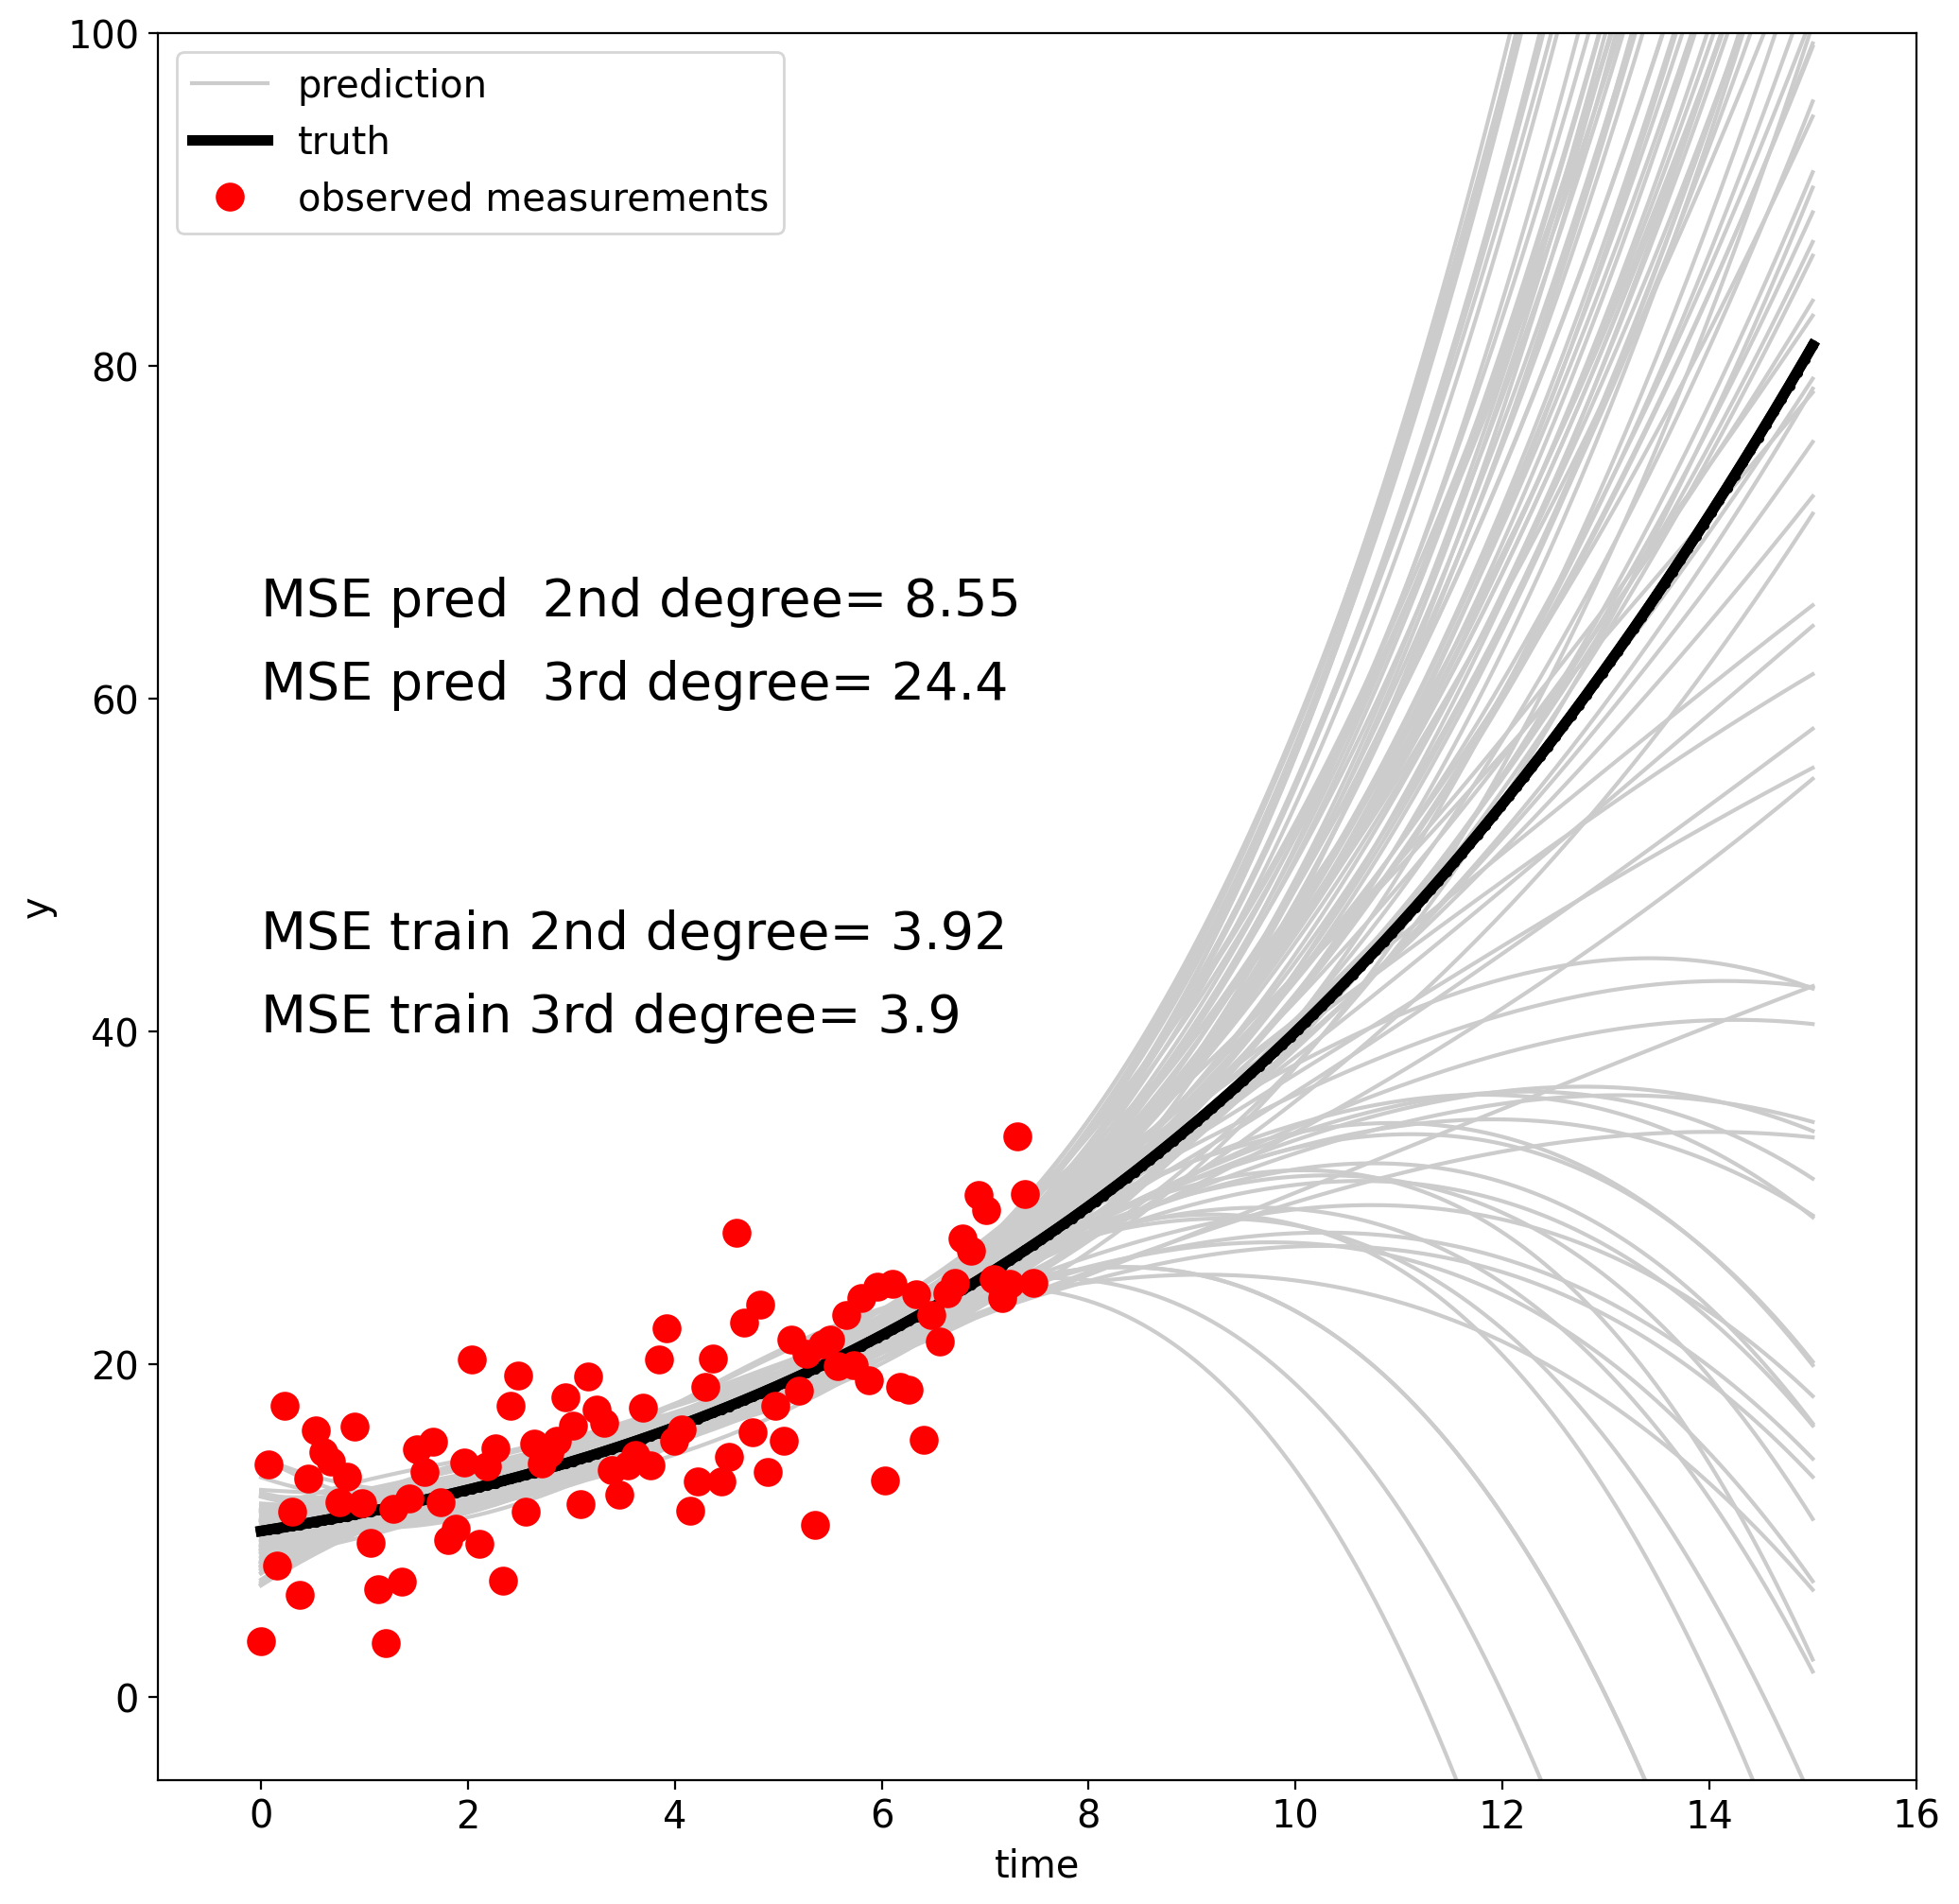

In [29]:
fig,ax=plt.subplots(1,figsize=[12,12])


plt.plot(t,yhat_vec,color=[0.8,0.8,0.8]);
plt.plot(t,yhat_vec[:,0],color=[0.8,0.8,0.8],label='prediction');
#plt.plot(t,np.percentile(yhat_vec,5,1),'g--',label='5th percentile prediction interval')
#plt.plot(t,np.percentile(yhat_vec,95,1),'g--',label='95th percentile prediction interval')
#plt.plot(t,np.percentile(yhat_vec,50,1),'g-',linewidth=4,label='median prediction')


plt.plot(t,ytrue,'k.-',linewidth=4,label='truth')
#plt.plot(t,yobs,'o',markersize=12,label='unobserved measurements')
plt.plot(t,ytrue,'k.-',linewidth=4)
#plt.vlines(t,ytrue-2*sigma_e,ytrue+2*sigma_e,color=[0.9,0.9,0.9])
#plt.plot(t,yhat,'g-',label='prediction',linewidth=4,)

plt.plot(t_train,yobs_train,'ro',markersize=10,label='observed measurements')
#plt.plot(t_train,yhat_train,'c',linewidth=4,markersize=10,label='training fit')
plt.xlim(left=-1,right=16);
plt.ylim(bottom=-5,top=100);
plt.legend()

plt.xlabel('time')
plt.ylabel('y')

mse_train=np.mean(mse_train_vec)
mse_pred=np.mean(mse_pred_vec)

plt.text(0,40,'MSE train 3rd degree= '+np.array2string(mse_train,precision=2),fontsize=20)
plt.text(0,60,'MSE pred  3rd degree= '+np.array2string(mse_pred,precision=2),fontsize=20)

mse_train=np.mean(mse_train_vec2)
mse_pred=np.mean(mse_pred_vec2)


plt.text(0,45,'MSE train 2nd degree= '+np.array2string(mse_train,precision=2),fontsize=20)
plt.text(0,65,'MSE pred  2nd degree= '+np.array2string(mse_pred,precision=2),fontsize=20)

Text(0, 60, 'AVG MSE pred  2nd degree= 6.11')

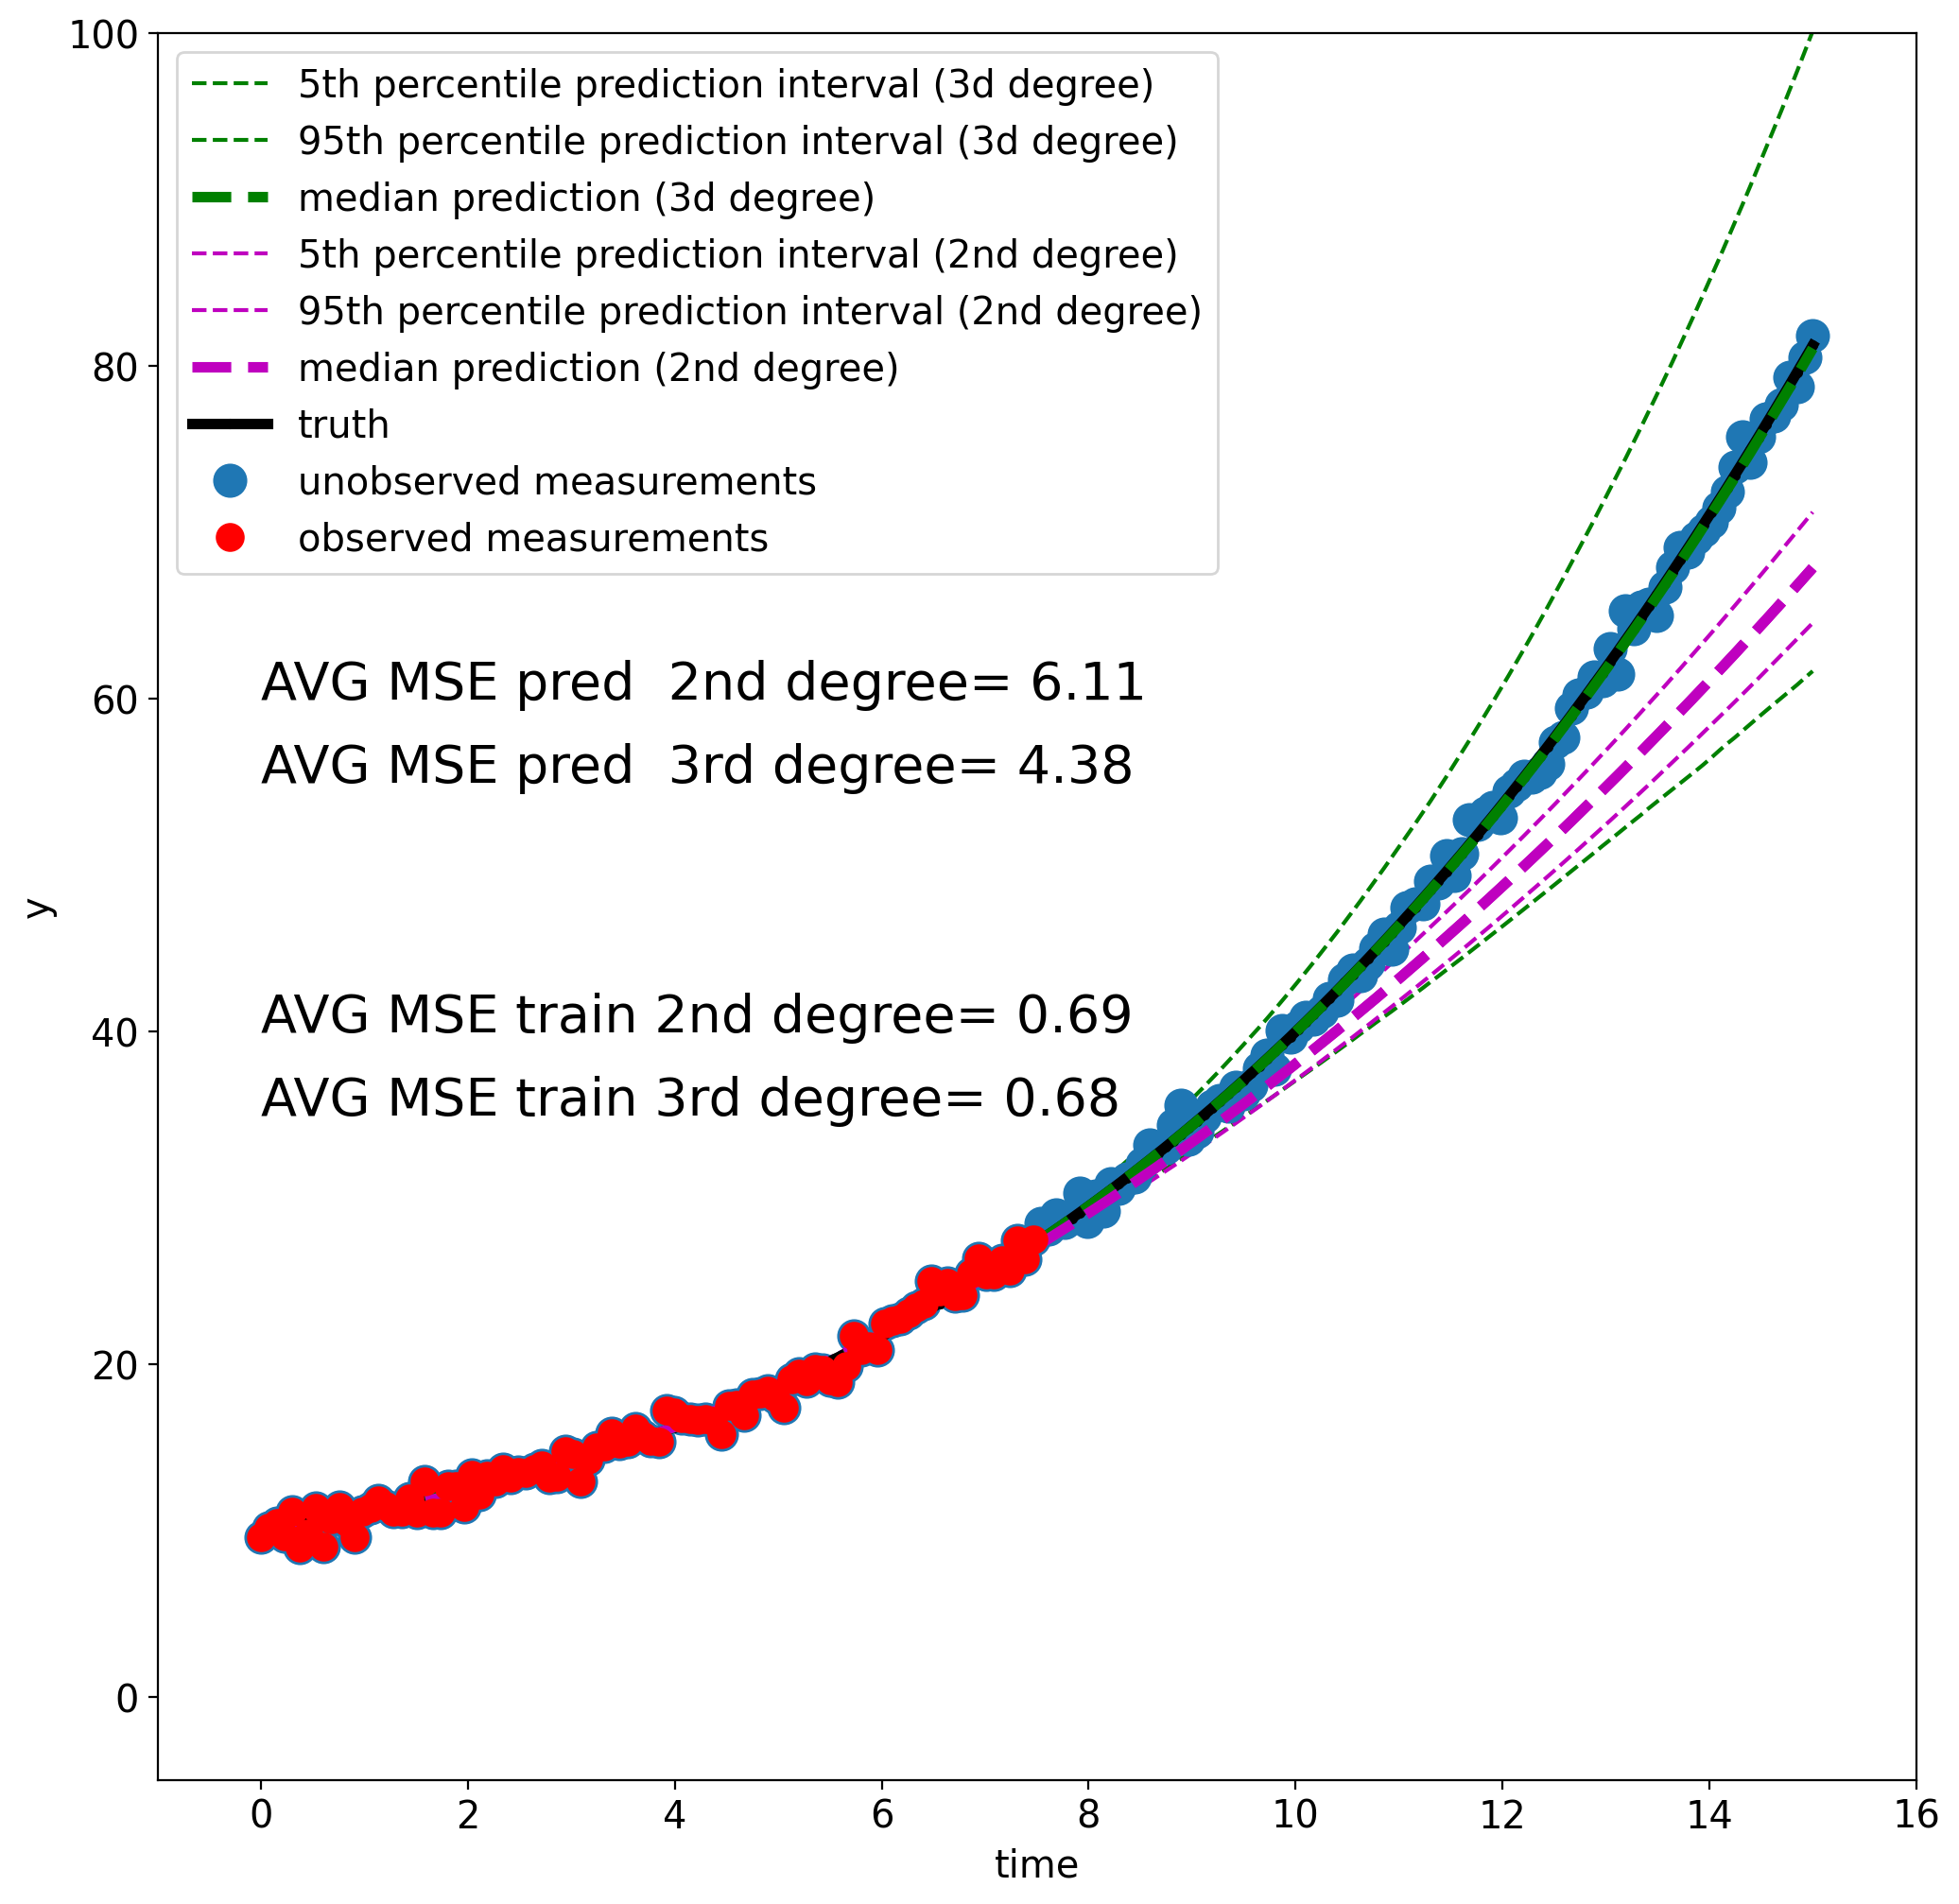

In [19]:
fig,ax=plt.subplots(1,figsize=[12,12])


#plt.plot(t,yhat_vec,color=[0.8,0.8,0.8]);
plt.plot(t,np.percentile(yhat_vec,5,1),'g--',label='5th percentile prediction interval (3d degree)')
plt.plot(t,np.percentile(yhat_vec,95,1),'g--',label='95th percentile prediction interval (3d degree)')
plt.plot(t,np.percentile(yhat_vec,50,1),'g--',linewidth=4,label='median prediction (3d degree)')

plt.plot(t,np.percentile(zhat_vec,5,1),'m--',label='5th percentile prediction interval (2nd degree)')
plt.plot(t,np.percentile(zhat_vec,95,1),'m--',label='95th percentile prediction interval (2nd degree)')
plt.plot(t,np.percentile(zhat_vec,50,1),'m--',linewidth=4,label='median prediction (2nd degree)')



plt.plot(t,ytrue,'k.-',linewidth=4,label='truth')
plt.plot(t,yobs,'o',markersize=12,label='unobserved measurements')
plt.plot(t,ytrue,'k.-',linewidth=4)

plt.plot(t,np.percentile(yhat_vec,50,1),'g--',linewidth=4)
plt.plot(t,np.percentile(zhat_vec,50,1),'m--',linewidth=4)
#plt.vlines(t,ytrue-2*sigma_e,ytrue+2*sigma_e,color=[0.9,0.9,0.9])
#plt.plot(t,yhat,'g-',label='prediction',linewidth=4,)

plt.plot(t_train,yobs_train,'ro',markersize=10,label='observed measurements')
#plt.plot(t_train,yhat_train,'c',linewidth=4,markersize=10,label='training fit')
plt.xlim(left=-1,right=16);
plt.ylim(bottom=-5,top=100);
plt.legend()

plt.xlabel('time')
plt.ylabel('y')

mse_train=np.mean(mse_train_vec)
mse_pred=np.mean(mse_pred_vec)

plt.text(0,35,'AVG MSE train 3rd degree= '+np.array2string(mse_train,precision=2),fontsize=20)
plt.text(0,55,'AVG MSE pred  3rd degree= '+np.array2string(mse_pred,precision=2),fontsize=20)

mse_train=np.mean(mse_train_vec2)
mse_pred=np.mean(mse_pred_vec2)


plt.text(0,40,'AVG MSE train 2nd degree= '+np.array2string(mse_train,precision=2),fontsize=20)
plt.text(0,60,'AVG MSE pred  2nd degree= '+np.array2string(mse_pred,precision=2),fontsize=20)

Text(0, 50, 'AVG MSE pred = 4.38')

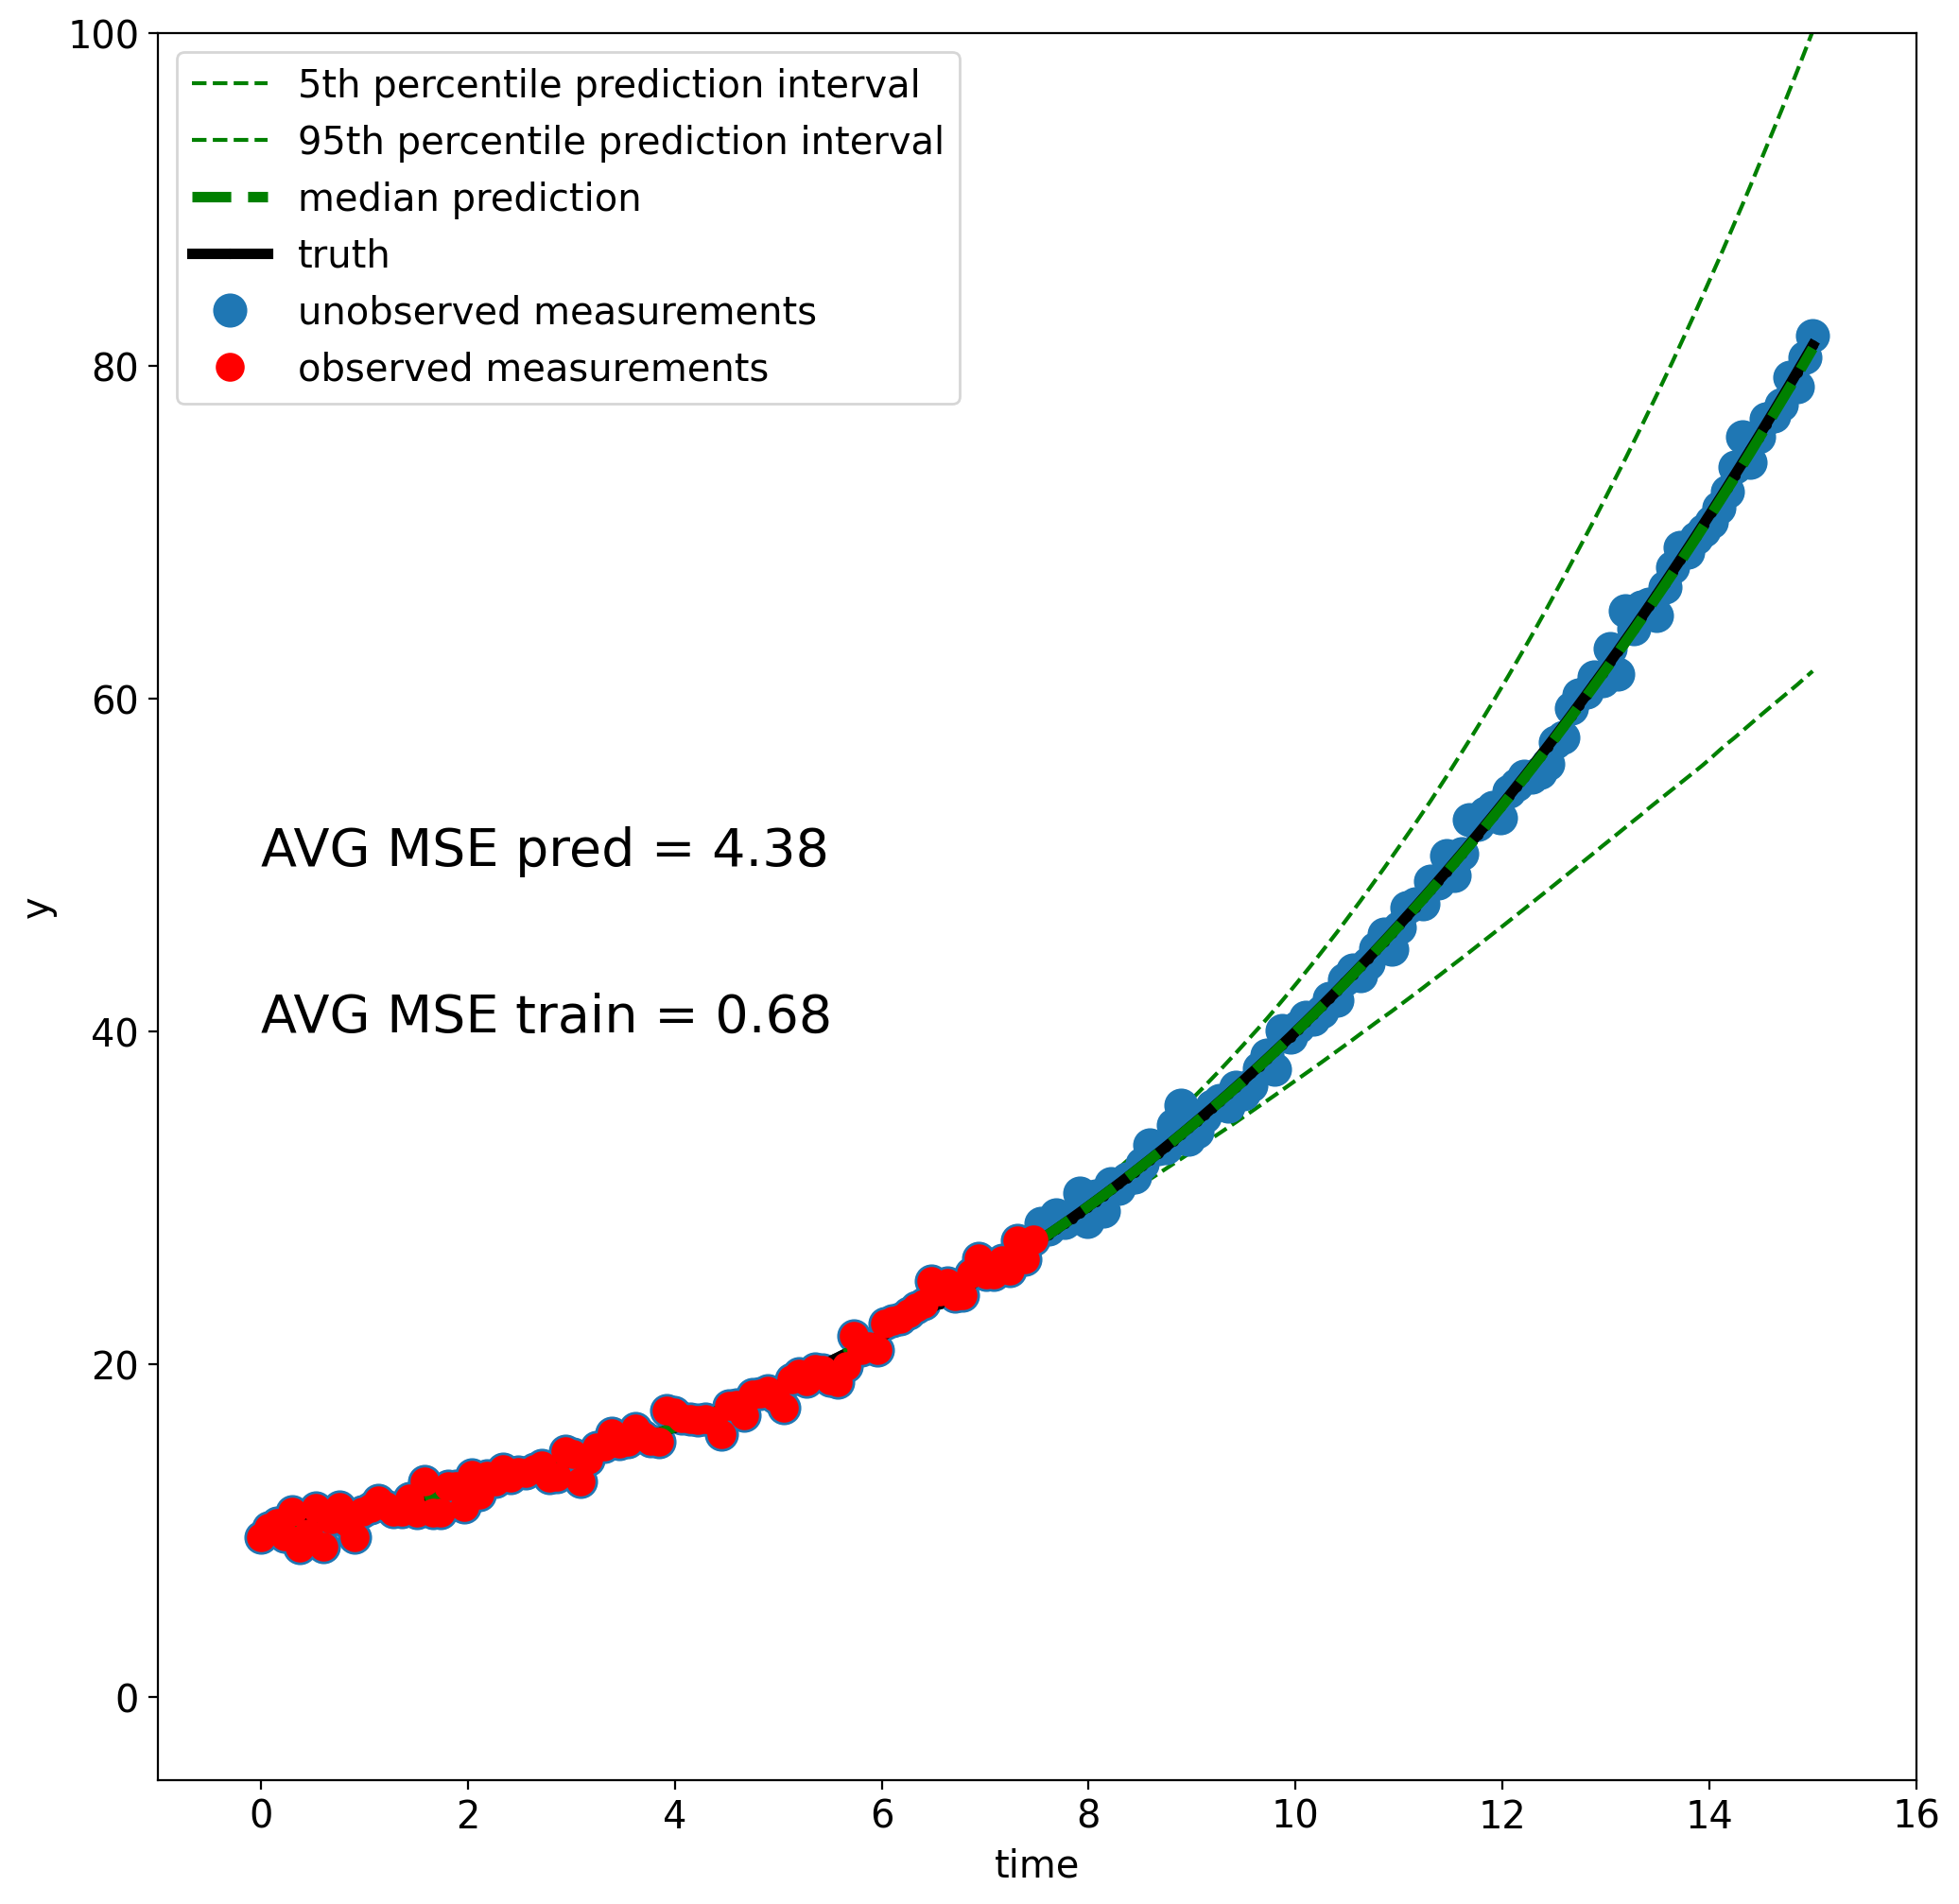

In [20]:
fig,ax=plt.subplots(1,figsize=[12,12])


#plt.plot(t,yhat_vec,color=[0.8,0.8,0.8]);
plt.plot(t,np.percentile(yhat_vec,5,1),'g--',label='5th percentile prediction interval')
plt.plot(t,np.percentile(yhat_vec,95,1),'g--',label='95th percentile prediction interval')
plt.plot(t,np.percentile(yhat_vec,50,1),'g--',linewidth=4,label='median prediction')


plt.plot(t,ytrue,'k.-',linewidth=4,label='truth')
plt.plot(t,yobs,'o',markersize=12,label='unobserved measurements')
plt.plot(t,ytrue,'k.-',linewidth=4)
plt.plot(t,np.percentile(yhat_vec,50,1),'g--',linewidth=4)
#plt.vlines(t,ytrue-2*sigma_e,ytrue+2*sigma_e,color=[0.9,0.9,0.9])
#plt.plot(t,yhat,'g-',label='prediction',linewidth=4,)

plt.plot(t_train,yobs_train,'ro',markersize=10,label='observed measurements')
#plt.plot(t_train,yhat_train,'c',linewidth=4,markersize=10,label='training fit')
plt.xlim(left=-1,right=16);
plt.ylim(bottom=-5,top=100);
plt.legend()

plt.xlabel('time')
plt.ylabel('y')

mse_train=np.mean(mse_train_vec)
mse_pred=np.mean(mse_pred_vec)

plt.text(0,40,'AVG MSE train = '+np.array2string(mse_train,precision=2),fontsize=20)
plt.text(0,50,'AVG MSE pred = '+np.array2string(mse_pred,precision=2),fontsize=20)



In [70]:
np.mean(bias_vec2)

-4.697835798836038